In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:01.130490


In [2]:
%%time
data = pd.read_csv('NY property data.csv')

Wall time: 1.91 s


In [3]:
data.shape

(1070994, 32)

In [4]:
data.head()

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [5]:
numrecords = len(data)
print(numrecords)

1070994


In [6]:
# %%time
# import pandas_profiling
# data.profile_report(correlations={"cramers": {"calculate": False}})
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file('DQR-lite.html')

In [7]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [8]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [9]:
data.tail().transpose()

,1070989,1070990,1070991,1070992,1070993
RECORD,1070990,1070991,1070992,1070993,1070994
BBLE,5080500083,5080500086,5080500089,5080500092,5080500094
BORO,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050
LOT,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,"TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1
LTFRONT,60,62,53,52,50


In [10]:
data.count()

RECORD      1070994
BBLE        1070994
BORO        1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [11]:
data.describe(include='all')

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
count,1.070994e+06,1070994,1.070994e+06,1.070994e+06,1.070994e+06,4636,1039249,1070994,1070994,1.070994e+06,...,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000,1070994,1070994,1070994
unique,NaN,1070994,NaN,NaN,NaN,12,863347,200,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
top,NaN,1000010101,NaN,NaN,NaN,E,PARKCHESTER PRESERVAT,R4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
freq,NaN,1,NaN,NaN,NaN,4148,6021,139879,660721,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1070994,1070994,1070994
mean,5.354975e+05,NaN,3.215427e+00,4.757239e+03,3.647221e+02,NaN,NaN,NaN,NaN,3.663530e+01,...,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679,NaN,NaN,NaN
std,3.091695e+05,NaN,1.201197e+00,3.676579e+03,8.532152e+02,NaN,NaN,NaN,NaN,7.403284e+01,...,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653,NaN,NaN,NaN
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000,NaN,NaN,NaN
25%,2.677492e+05,NaN,3.000000e+00,1.555000e+03,2.300000e+01,NaN,NaN,NaN,NaN,1.900000e+01,...,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000,NaN,NaN,NaN
50%,5.354975e+05,NaN,3.000000e+00,4.047000e+03,4.900000e+01,NaN,NaN,NaN,NaN,2.500000e+01,...,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000,NaN,NaN,NaN
75%,8.032458e+05,NaN,4.000000e+00,6.898000e+03,1.430000e+02,NaN,NaN,NaN,NaN,4.000000e+01,...,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000,NaN,NaN,NaN


In [12]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [13]:
numerics = ['LTFRONT','LTDEPTH','STORIES','FULLVAL','AVLAND','AVTOT','EXLAND','EXTOT','BLDFRONT','BLDDEPTH',
            'AVLAND2','AVTOT2','EXLAND2','EXTOT2']
categoricals = ['RECORD','BBLE','BORO','BLOCK','LOT','EASEMENT','OWNER','BLDGCL','TAXCLASS','EXT',
            'EXCD1','STADDR','ZIP','EXMPTCL','EXCD2','PERIOD','YEAR','VALTYPE']

In [14]:
def count_zeros(data):
    count=0
    for i in data:
        if i==0:
            count+=1
    return count

In [182]:
statistics_of_data1 = []
for col in numerics:
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].min(),
                             f"{data[col].max():.2f}",
                             data[col].mode()[0],
                            data[col].mean(),
                            data[col].std()
                            
                             ))

stats_df1 = pd.DataFrame(statistics_of_data1, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Min', 'Max','Most Common','mean','std'])
stats_df1

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Most Common,mean,std
0,LTFRONT,numeric,1070994,100.0%,169108,0.0,9999.00,0.0,36.635301,7.403284e+01
1,LTDEPTH,numeric,1070994,100.0%,170128,0.0,9999.00,100.0,88.861594,7.639628e+01
2,STORIES,numeric,1014730,94.74656253909919%,0,1.0,119.00,2.0,5.006918,8.365707e+00
3,FULLVAL,numeric,1070994,100.0%,13007,0.0,6150000000.00,0.0,874264.505434,1.158243e+07
4,AVLAND,numeric,1070994,100.0%,13009,0.0,2668500000.00,0.0,85067.918672,4.057260e+06
5,AVTOT,numeric,1070994,100.0%,13007,0.0,4668308947.00,0.0,227238.168711,6.877529e+06
6,EXLAND,numeric,1070994,100.0%,491699,0.0,2668500000.00,0.0,36423.890692,3.981576e+06
7,EXTOT,numeric,1070994,100.0%,432572,0.0,4668308947.00,0.0,91186.981682,6.508403e+06
8,BLDFRONT,numeric,1070994,100.0%,228815,0.0,7575.00,0.0,23.042770,3.557970e+01
9,BLDDEPTH,numeric,1070994,100.0%,228853,0.0,9393.00,0.0,39.922836,4.270715e+01


In [16]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,RECORD,categorical,1070994,100.0%,0,1070994,1
1,BBLE,categorical,1070994,100.0%,0,1070994,1000010101
2,BORO,categorical,1070994,100.0%,0,5,4
3,BLOCK,categorical,1070994,100.0%,0,13984,3944
4,LOT,categorical,1070994,100.0%,0,6366,1
5,EASEMENT,categorical,4636,0.4328689049611856%,0,12,E
6,OWNER,categorical,1039249,97.03593110699032%,0,863347,PARKCHESTER PRESERVAT
7,BLDGCL,categorical,1070994,100.0%,0,200,R4
8,TAXCLASS,categorical,1070994,100.0%,0,11,1
9,EXT,categorical,354305,33.081884679092504%,0,3,G


### explore each field 

In [17]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

In [18]:
len(data['RECORD'].unique())

1070994

In [19]:
len(data['RECORD'])

1070994

<AxesSubplot:>

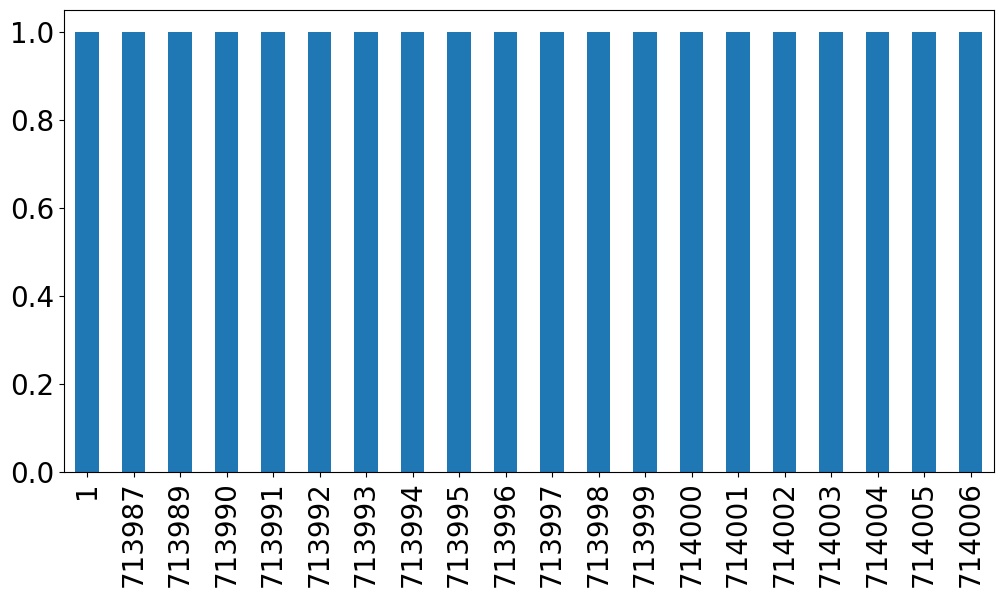

In [20]:
data['RECORD'].value_counts().head(20).plot(kind='bar')

In [21]:
len(data['BBLE'].unique())

1070994

<AxesSubplot:>

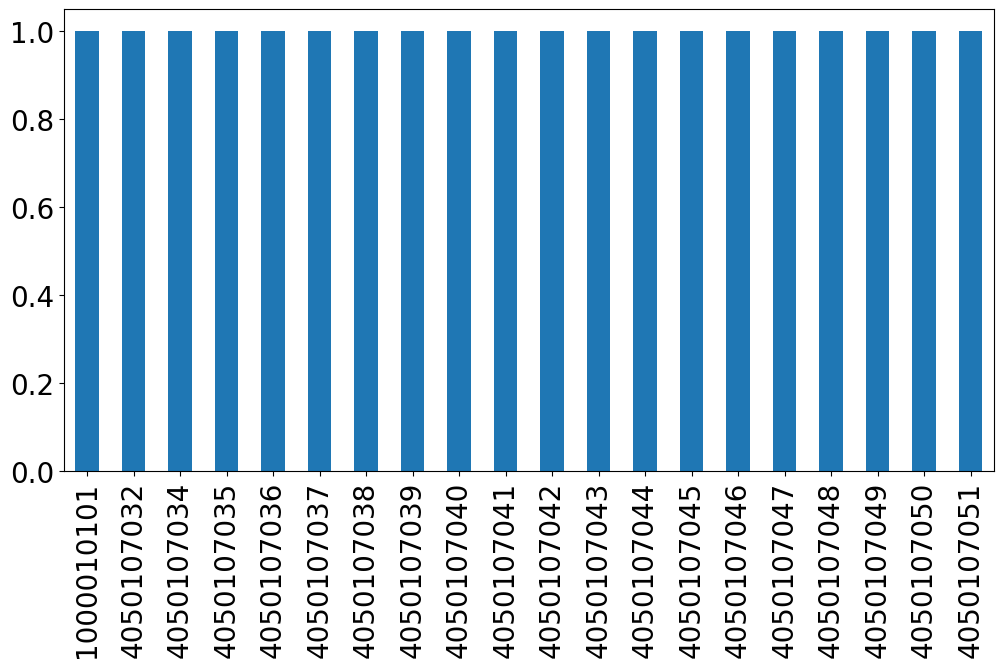

In [22]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

In [23]:
len(data['BORO'].unique())

5

In [24]:
data['BORO'].count() * 100 / numrecords

100.0

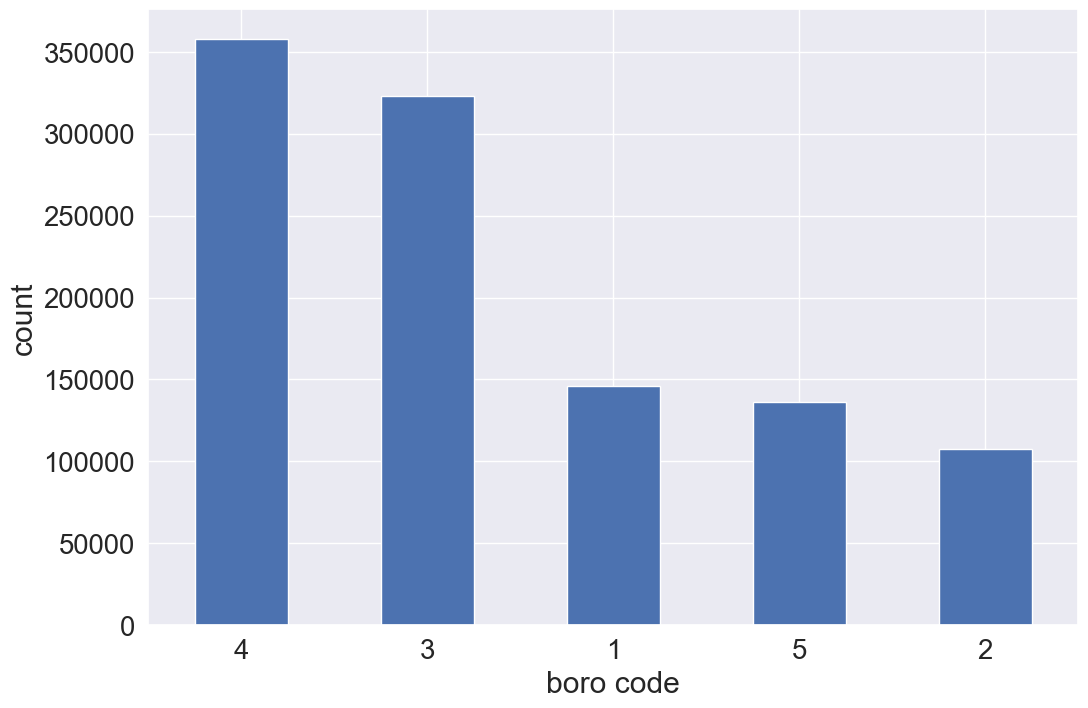

In [200]:
sns.set(font_scale = 1.8)
data['BORO'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("boro code")
plt.ylabel("count")
plt.savefig('plot')

In [395]:
data['BORO'].value_counts()

4    358046
3    323243
1    146220
5    136200
2    107285
Name: BORO, dtype: int64

In [26]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [27]:
len(data['BLOCK'].unique())

13984

In [28]:
data['BLOCK'].min()

1

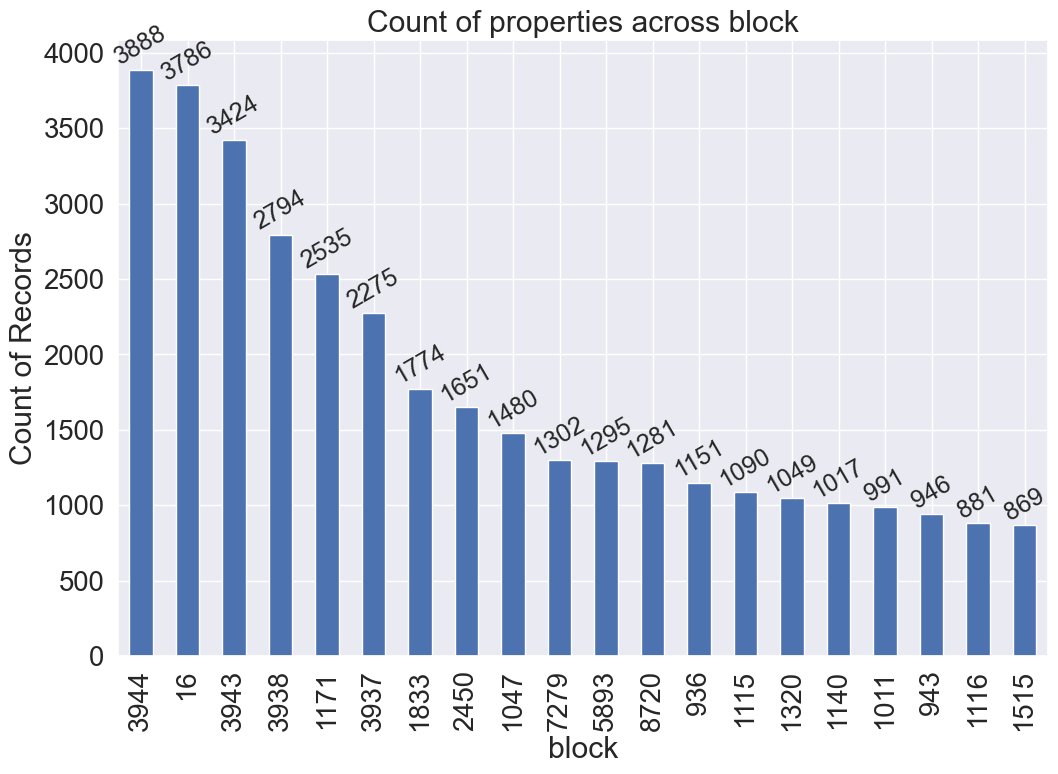

In [405]:
own = data['BLOCK'].value_counts().head(20)

data['BLOCK'].value_counts().head(20).plot(kind='bar')
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("block")
plt.ylabel("Count of Records")
plt.title('Count of properties across block')
plt.savefig('plot.jpeg')

In [401]:
data['BLOCK'].value_counts()

3944     3888
16       3786
3943     3424
3938     2794
1171     2535
         ... 
9682        1
12325       1
10154       1
16129       1
2052        1
Name: BLOCK, Length: 13984, dtype: int64

In [30]:
data['LOT'].count() * 100 / numrecords

100.0

In [31]:
len(data['LOT'].unique())

6366

In [32]:
data['LOT'].value_counts()

1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
6115        1
6116        1
6117        1
6118        1
779         1
Name: LOT, Length: 6366, dtype: int64

In [33]:
data['LOT'].min()

1

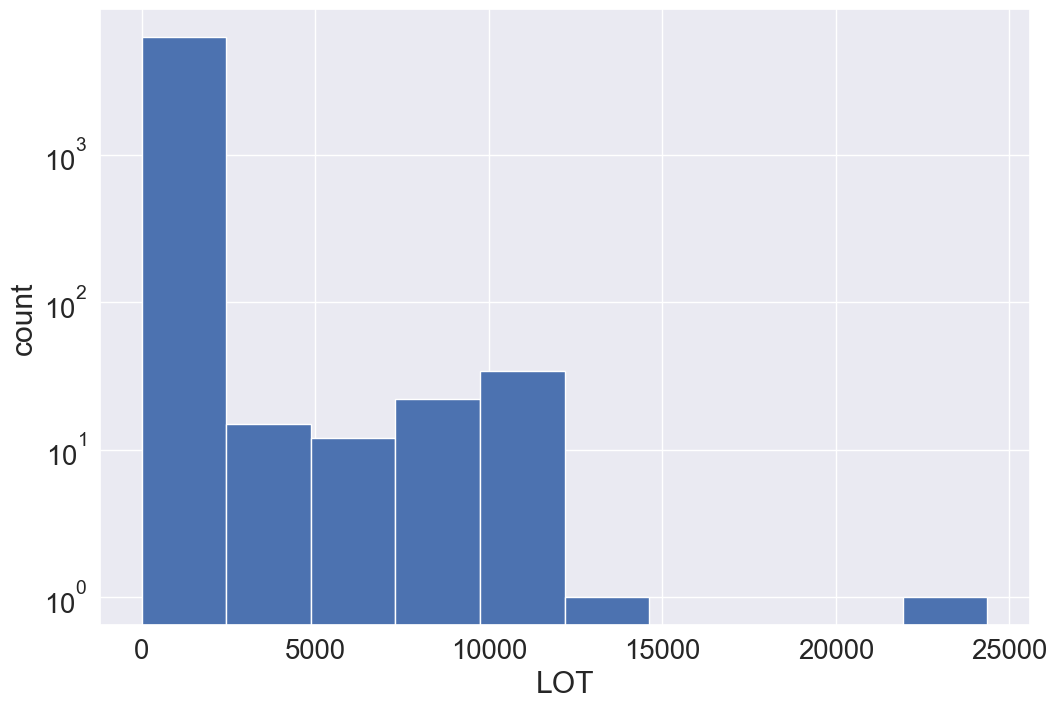

In [206]:
sns.set(font_scale = 1.8)
data['LOT'].value_counts().plot(kind='hist', bins = 10, logy = True)
plt.xticks(rotation=0)
plt.xlabel("LOT")
plt.ylabel("count")
plt.savefig('plot')

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOT', ylabel='count'>

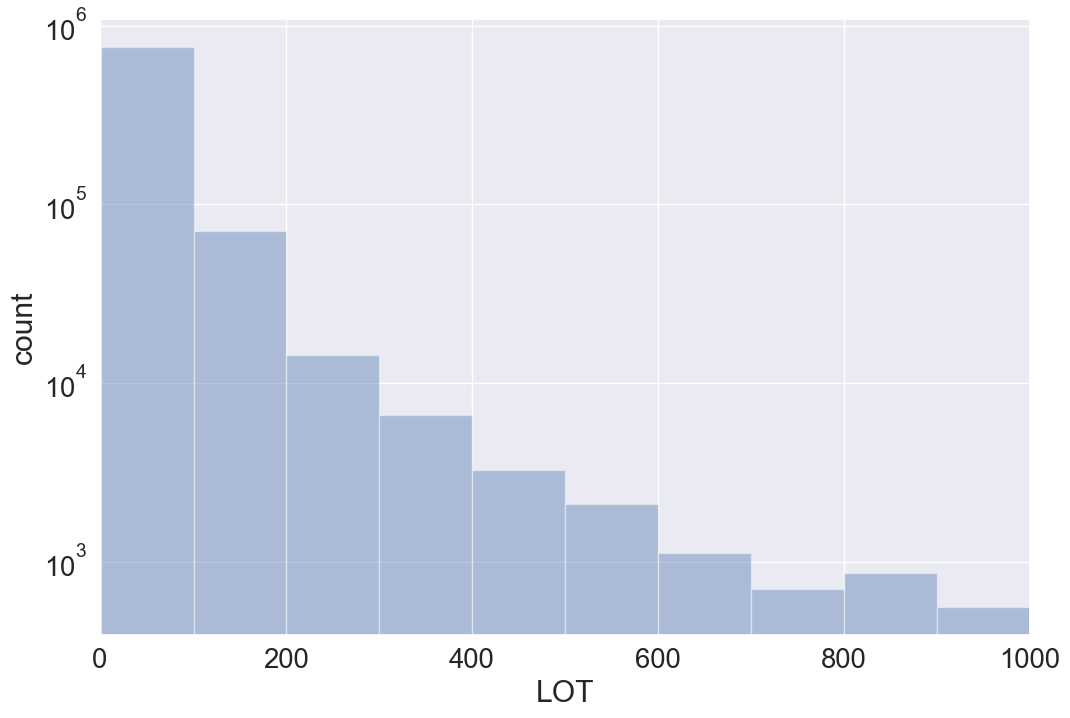

In [211]:
xhigh = 1000
plt.xlim(0,xhigh)
temp = data[data['LOT'] <= xhigh]
plt.ylabel("count")
plt.yscale('log')
sns.distplot(temp['LOT'],bins=10, kde=False)

In [36]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [37]:
len(data['EASEMENT'].unique())

13

In [38]:
data['EASEMENT'].value_counts()

E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
L       3
P       3
M       2
U       1
Name: EASEMENT, dtype: int64

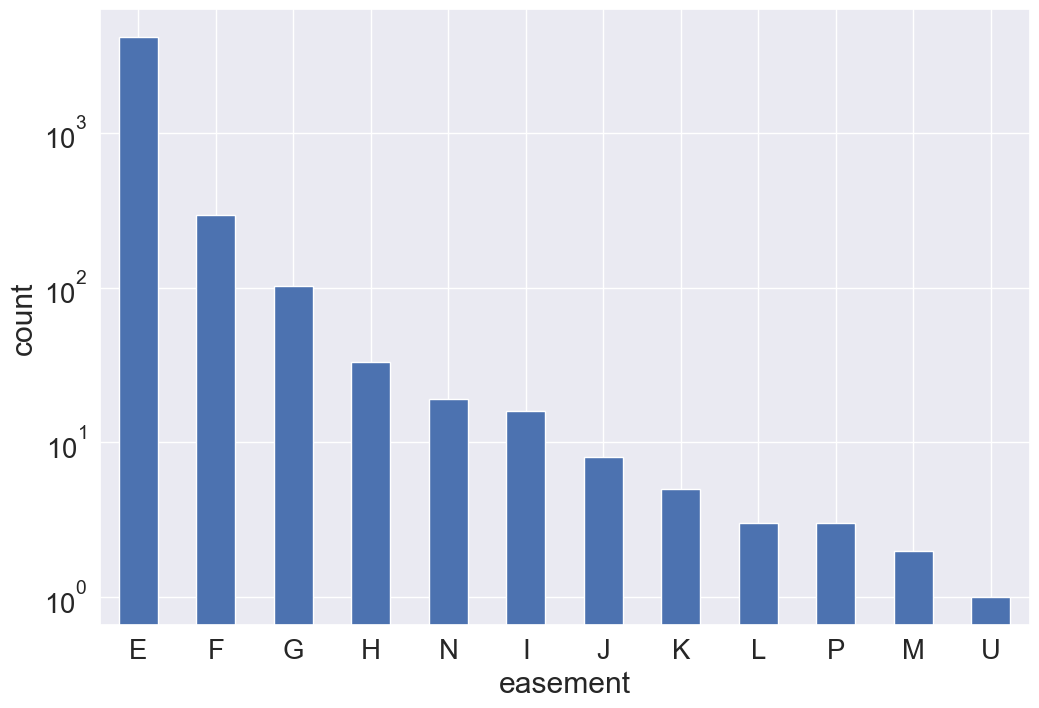

In [212]:
plt.yscale('log')
data['EASEMENT'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.xlabel("easement")
plt.xticks(rotation=0)
plt.savefig('plot.png')

<AxesSubplot:>

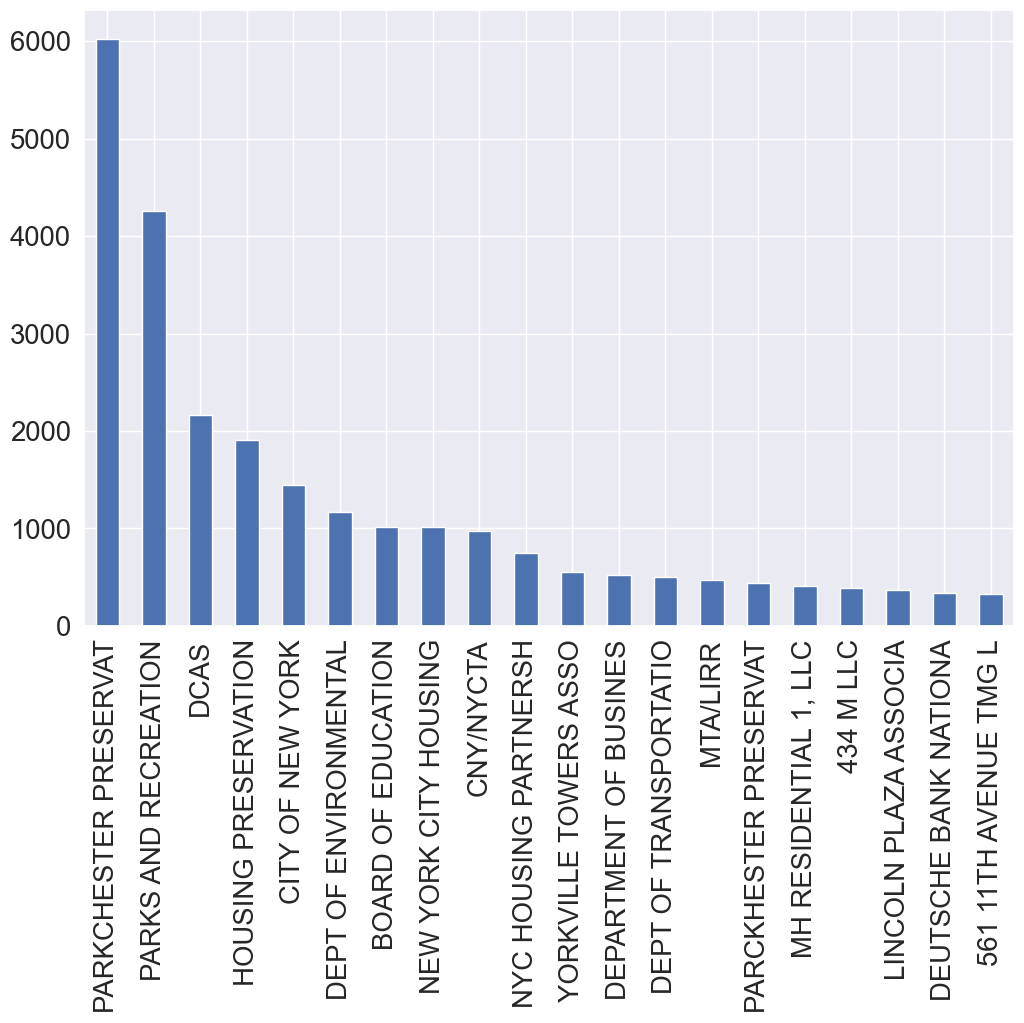

In [215]:
data['OWNER'].value_counts().head(20).plot(kind='bar')

In [41]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [42]:
len(data['OWNER'].unique())

863348

In [43]:
data['OWNER'].value_counts()

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
ROSE, LORNA                 1
ELARIO ALTERNO              1
CHARLES,VIRGINIA            1
HAYLES, HEATHER             1
EDWARD DONOHUE              1
Name: OWNER, Length: 863347, dtype: int64

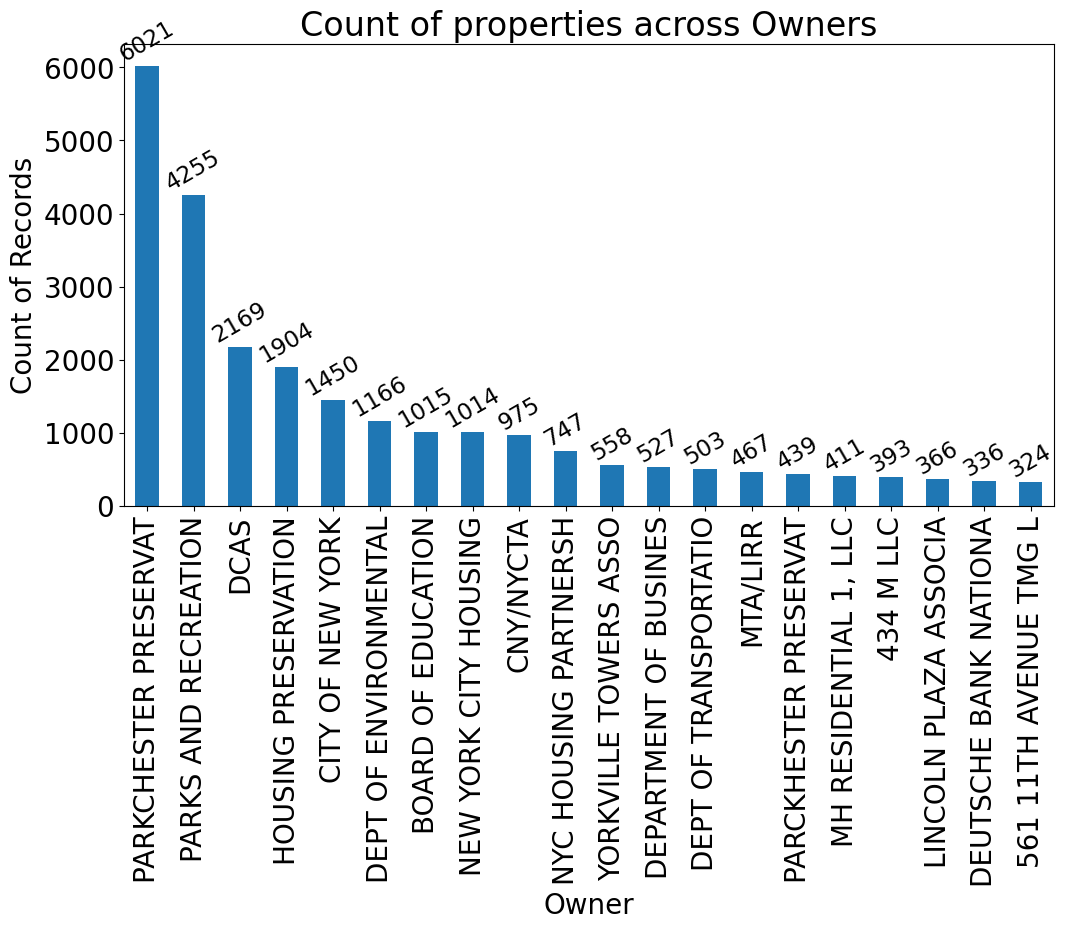

In [44]:
own = data['OWNER'].value_counts().head(20)

data['OWNER'].value_counts().head(20).plot(kind='bar')
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("Owner")
plt.ylabel("Count of Records")
plt.title('Count of properties across Owners')
plt.savefig('plot.jpeg')

In [45]:
len(data['BLDGCL'].unique())

200

In [46]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [47]:
data['BLDGCL'].value_counts()

R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
E6         1
Y5         1
Name: BLDGCL, Length: 200, dtype: int64

In [48]:
data[data['BLDGCL'] == 0]

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'R4'),
  Text(1, 0, 'A1'),
  Text(2, 0, 'A5'),
  Text(3, 0, 'B1'),
  Text(4, 0, 'B2'),
  Text(5, 0, 'C0'),
  Text(6, 0, 'B3'),
  Text(7, 0, 'A2'),
  Text(8, 0, 'A9'),
  Text(9, 0, 'B9'),
  Text(10, 0, 'V0'),
  Text(11, 0, 'R5'),
  Text(12, 0, 'R3'),
  Text(13, 0, 'C3'),
  Text(14, 0, 'C1'),
  Text(15, 0, 'S2'),
  Text(16, 0, 'C2'),
  Text(17, 0, 'R2'),
  Text(18, 0, 'R1'),
  Text(19, 0, 'K1')])

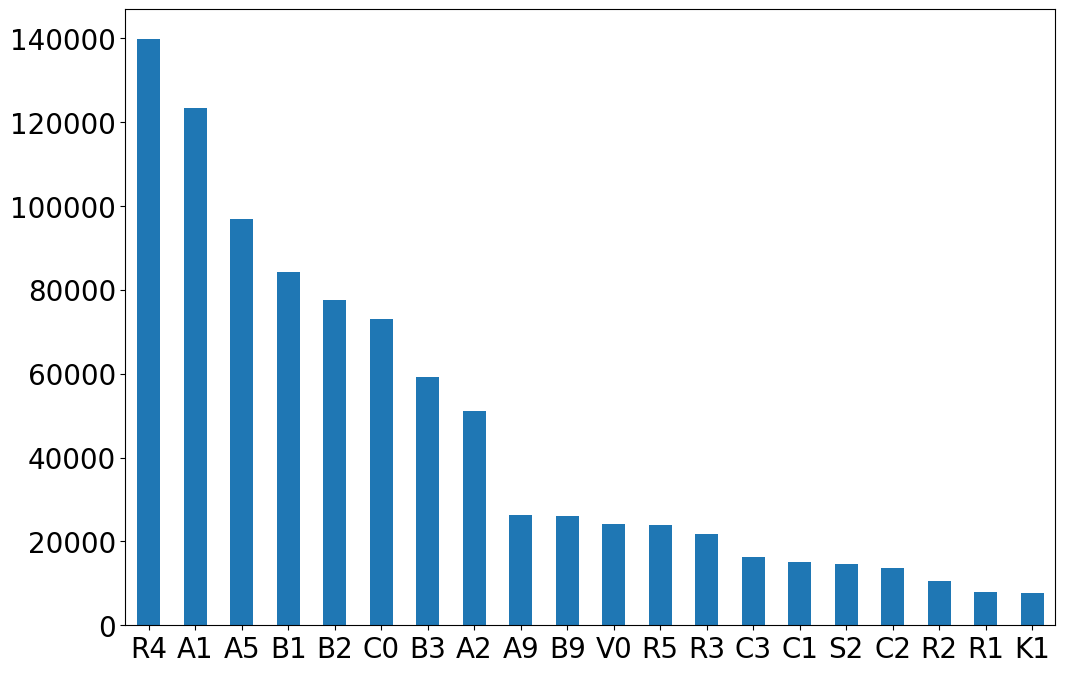

In [49]:
data['BLDGCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

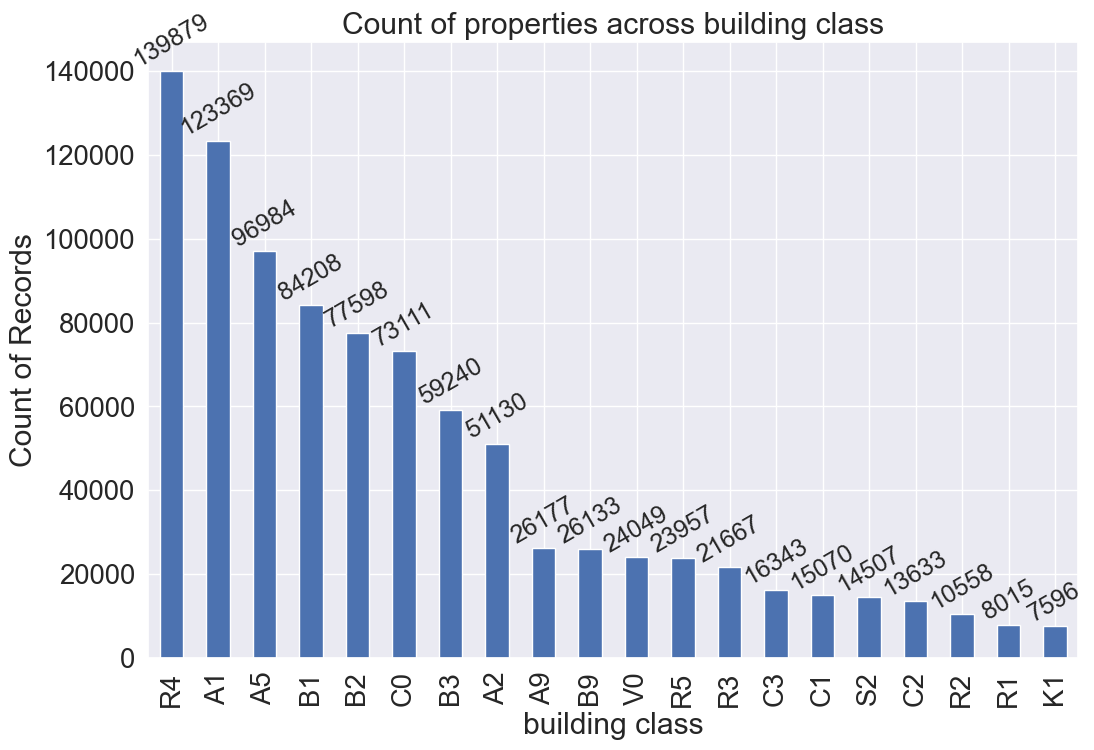

In [250]:
own = data['BLDGCL'].value_counts().head(20)

data['BLDGCL'].value_counts().head(20).plot(kind='bar')
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("building class")
plt.ylabel("Count of Records")
plt.title('Count of properties across building class')
plt.savefig('plot.jpeg')

In [50]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [51]:
len(data['TAXCLASS'].unique())

11

In [52]:
data['TAXCLASS'].value_counts()

1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: TAXCLASS, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '2A'),
  Text(4, 0, '1B'),
  Text(5, 0, '1A'),
  Text(6, 0, '2B'),
  Text(7, 0, '2C'),
  Text(8, 0, '3'),
  Text(9, 0, '1C'),
  Text(10, 0, '1D')])

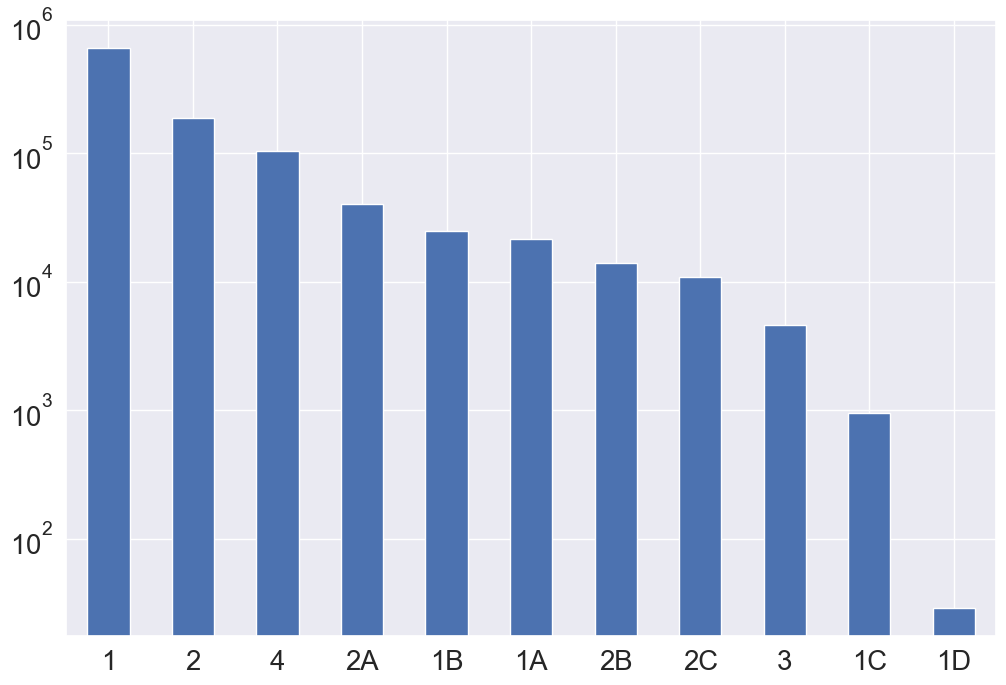

In [218]:
plt.yscale('log')
data['TAXCLASS'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

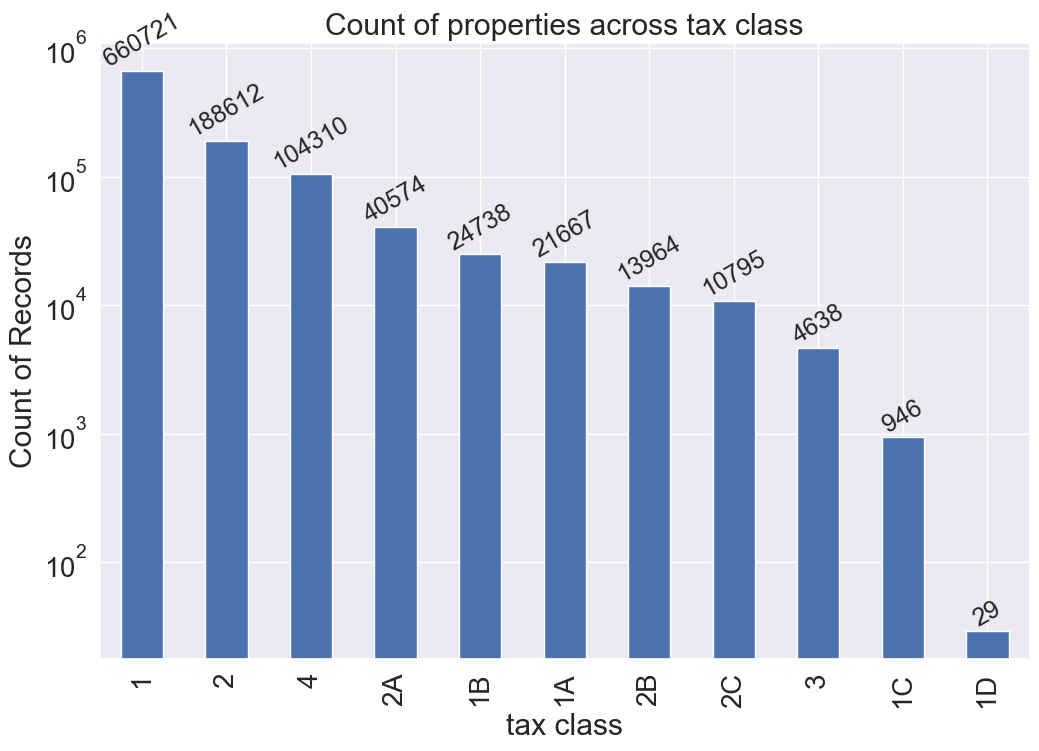

In [221]:
own = data['TAXCLASS'].value_counts().head(20)

data['TAXCLASS'].value_counts().head(20).plot(kind='bar', logy = True)
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("tax class")
plt.ylabel("Count of Records")
plt.title('Count of properties across tax class')
plt.savefig('plot.jpeg')

In [54]:
data['LTFRONT'].count() * 100 / numrecords

100.0

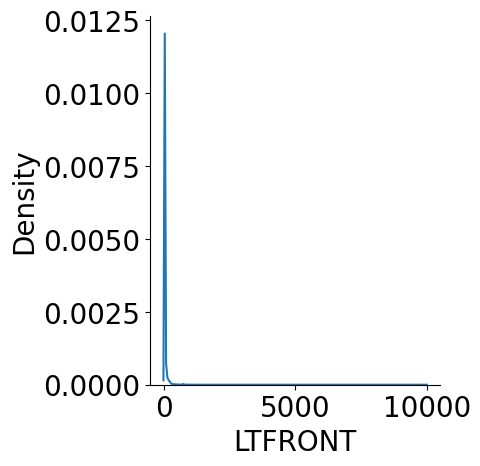

In [55]:
sns.displot(data['LTFRONT'], kind = 'kde')

<AxesSubplot:xlabel='LTFRONT'>

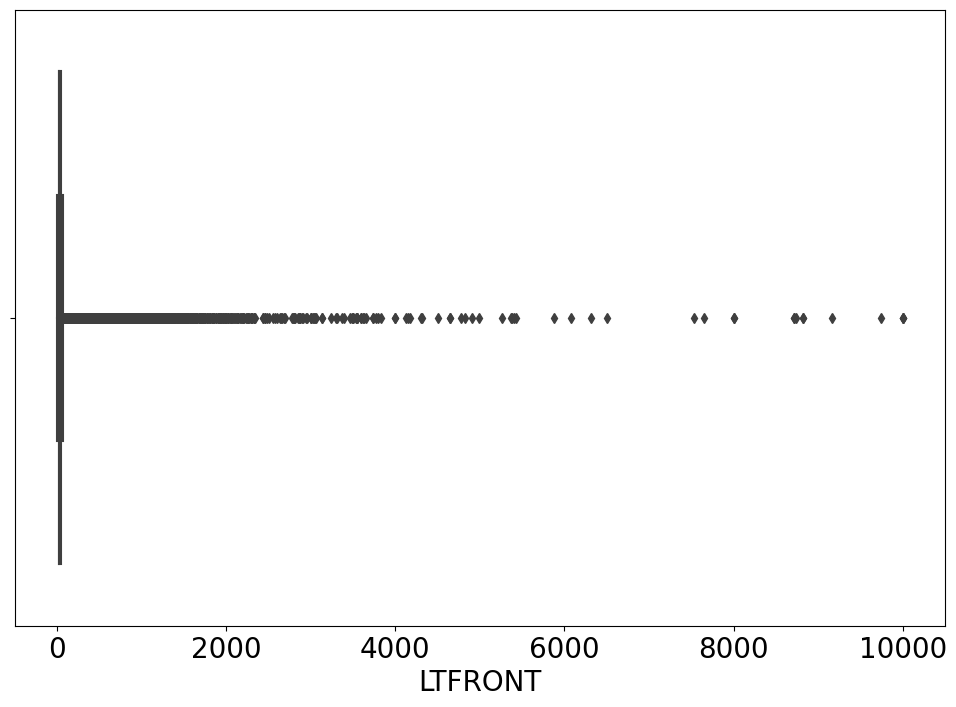

In [56]:
sns.boxplot(x='LTFRONT', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT', ylabel='Density'>

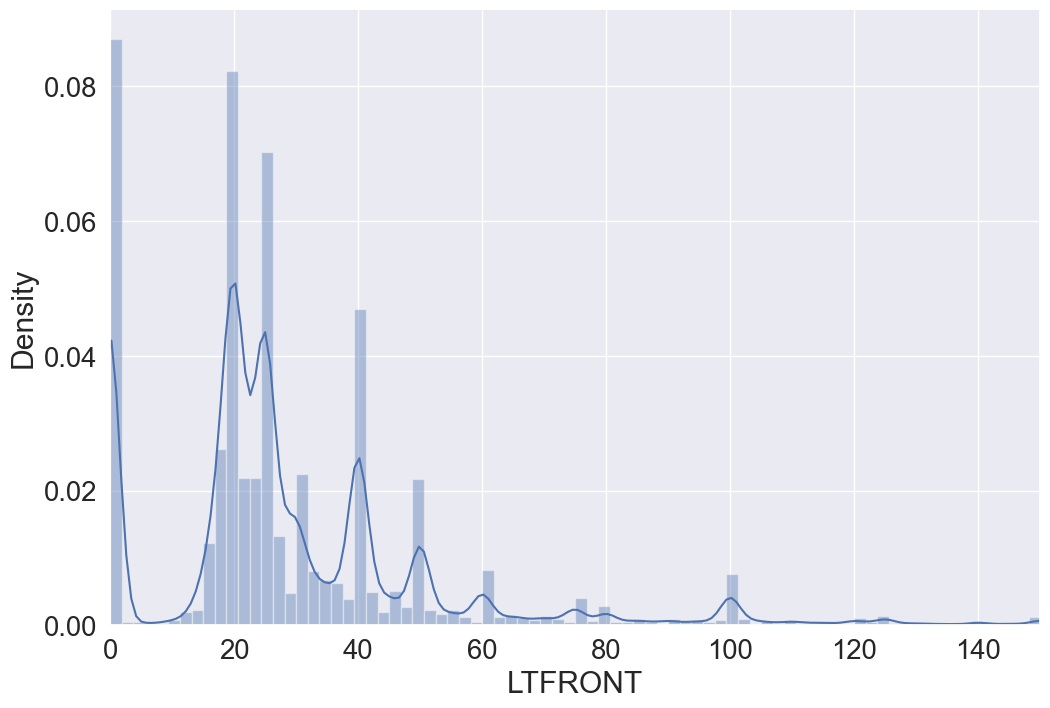

In [230]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=80, kde=True)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT'>

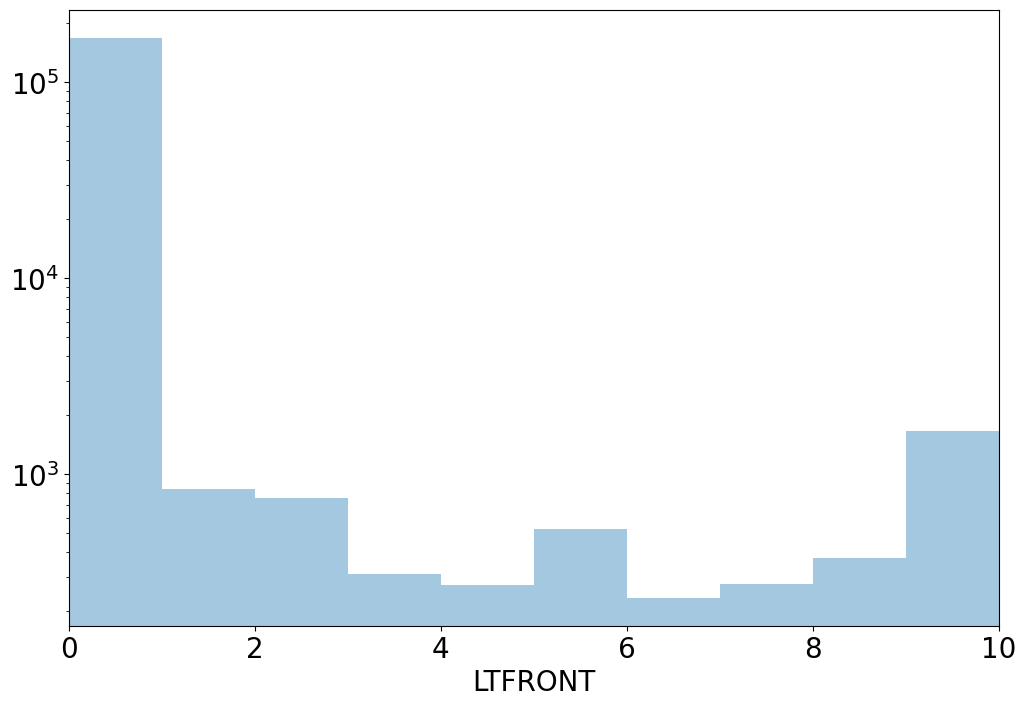

In [58]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='LTDEPTH'>

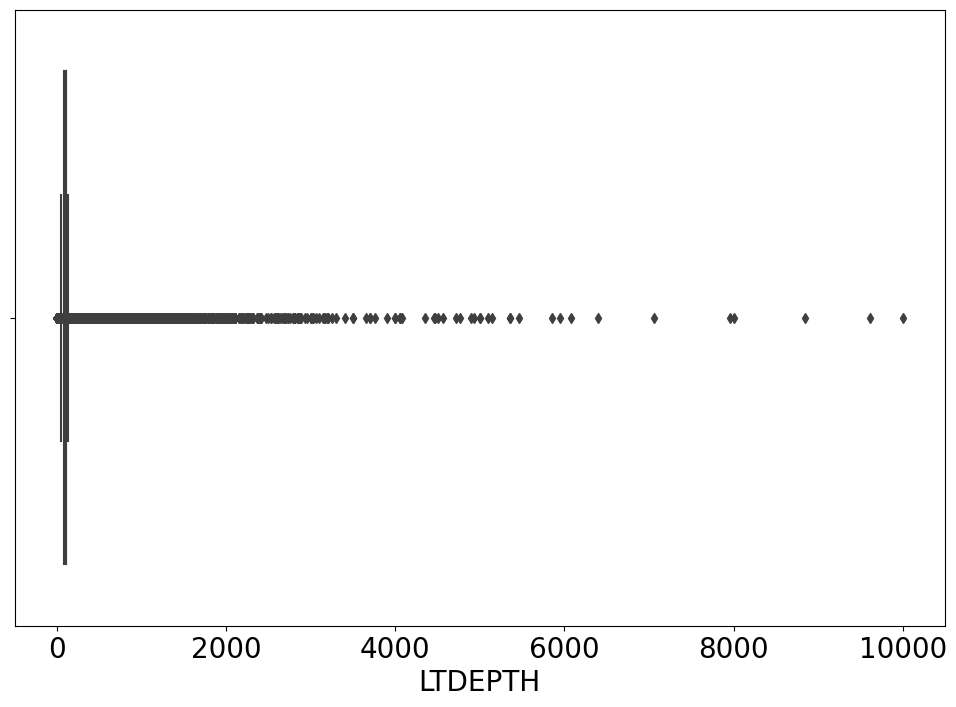

In [59]:
sns.boxplot(x='LTDEPTH', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTDEPTH', ylabel='Density'>

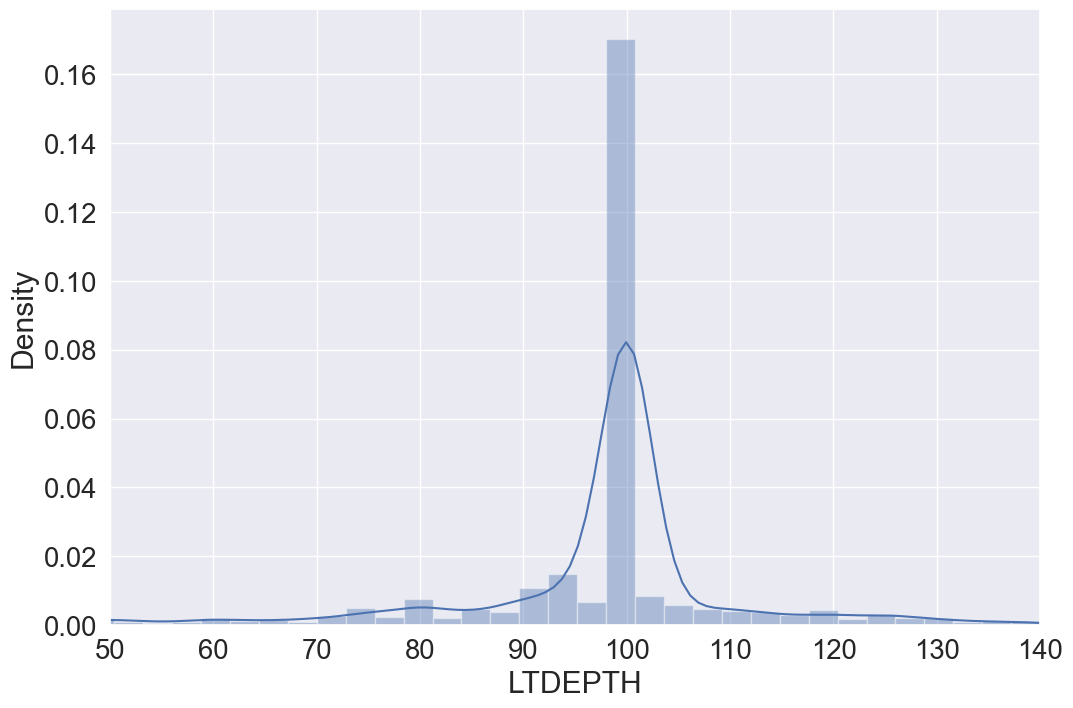

In [244]:
#look at the most relevant range
xhigh = 140
plt.xlim(50,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.distplot(temp['LTDEPTH'],bins=50, kde=True)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTDEPTH'>

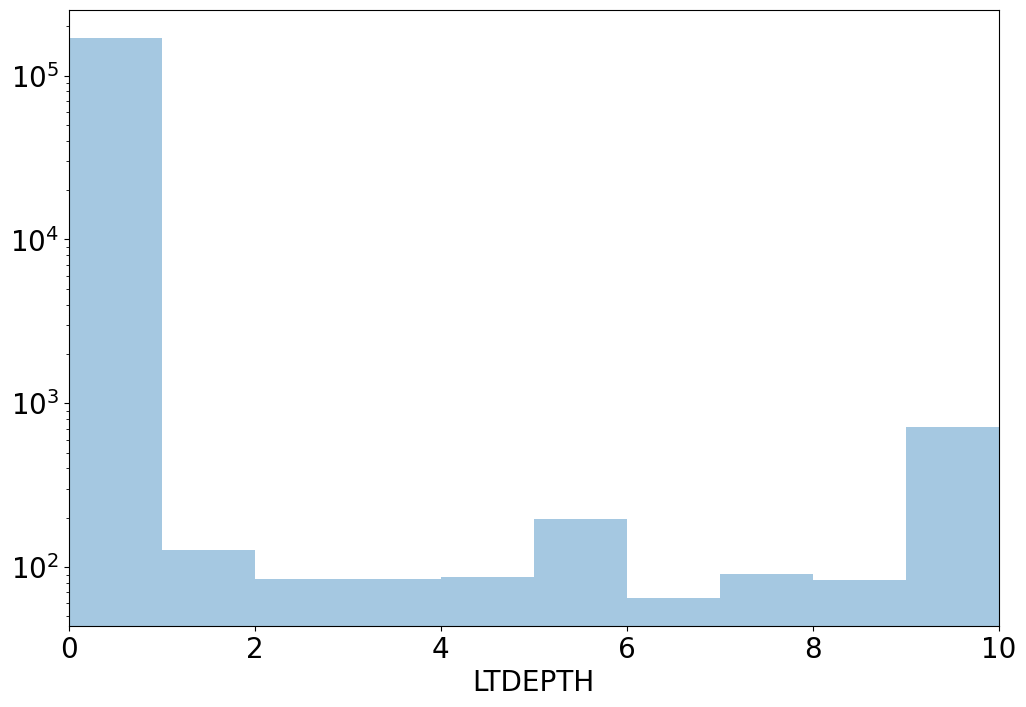

In [61]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'],bins=10, kde=False)

### Look at the number of sizes that are zero or unusually small. These aren't really zero, more likely they're missing data

In [62]:
len(data[data['LTFRONT']==0])

169108

In [63]:
len(data[data['LTFRONT']==1])

839

In [64]:
len(data[data["LTFRONT"]==2])

762

In [65]:
data['LTFRONT'].value_counts()

0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1320         1
1151         1
626          1
1162         1
1201         1
Name: LTFRONT, Length: 1297, dtype: int64

In [66]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='LTDEPTH'>

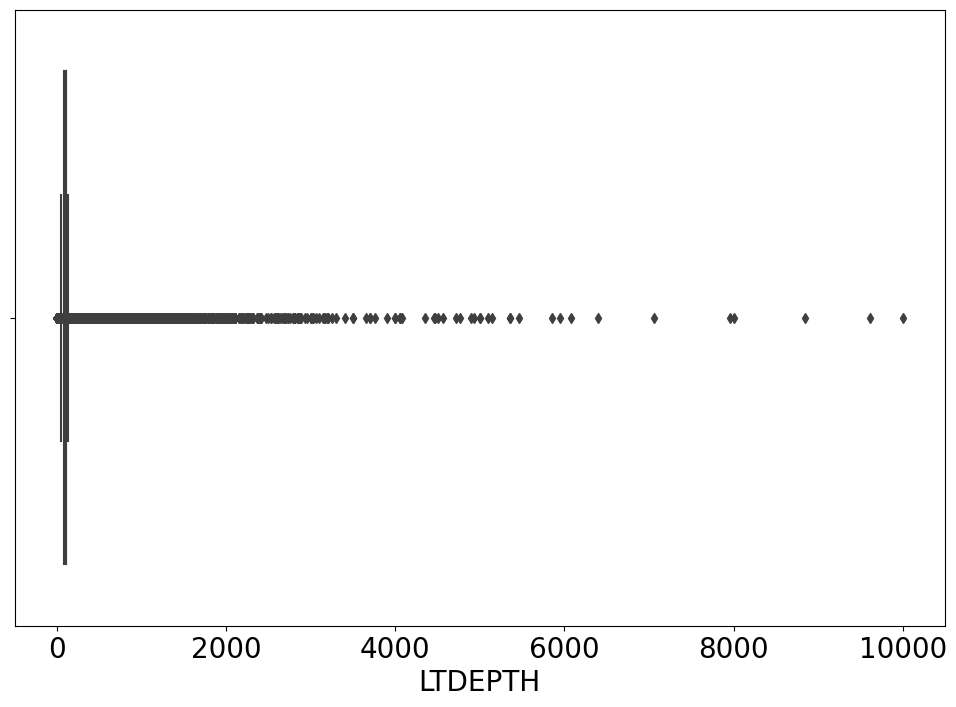

In [67]:
sns.boxplot(x='LTDEPTH', data=data)

In [68]:
len(data[data['LTDEPTH']==0])

170128

In [69]:
len(data[data['LTDEPTH']==1])

127

In [70]:
len(data[data["LTDEPTH"]==2])

84

In [71]:
data['LTDEPTH'].value_counts()

100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
1252         1
1567         1
1305         1
2532         1
1419         1
Name: LTDEPTH, Length: 1370, dtype: int64

In [72]:
data['EXT'].value_counts()

G     266970
E      49442
EG     37893
Name: EXT, dtype: int64

In [73]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

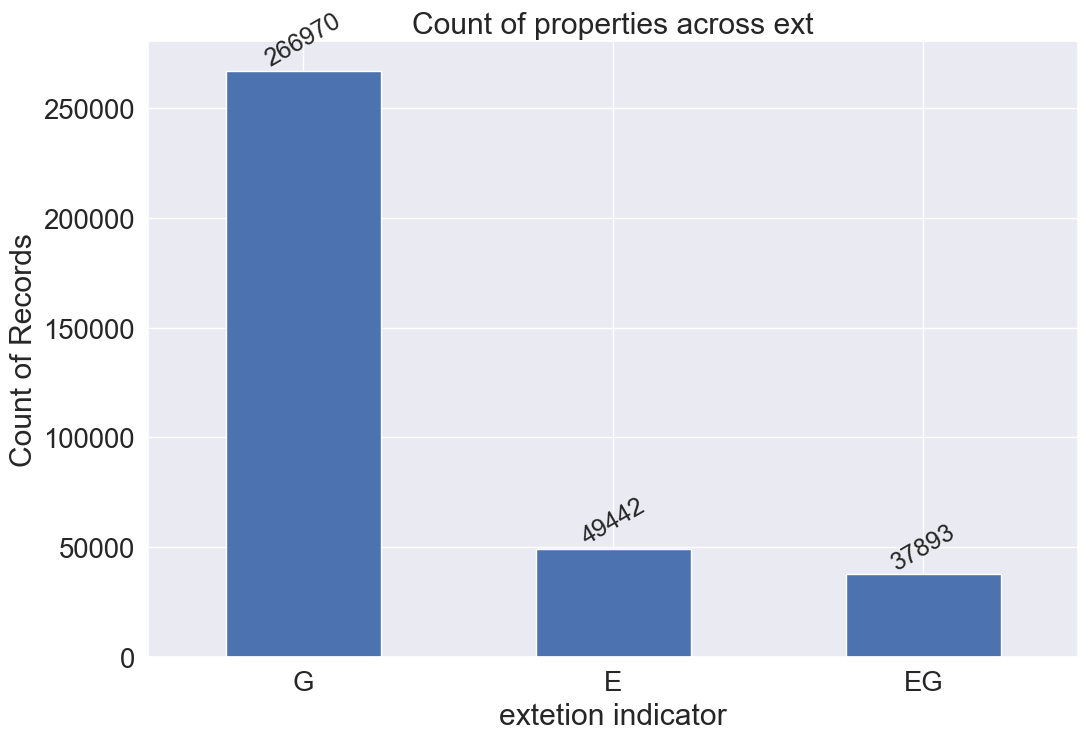

In [251]:
own = data['EXT'].value_counts()

data['EXT'].value_counts().plot(kind='bar')
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("extetion indicator")
plt.ylabel("Count of Records")
plt.title('Count of properties across ext')
plt.xticks(rotation=0)
plt.savefig('plot.jpeg')

In [75]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [76]:
sum(pd.isnull(data['STORIES']))

56264

<AxesSubplot:xlabel='STORIES'>

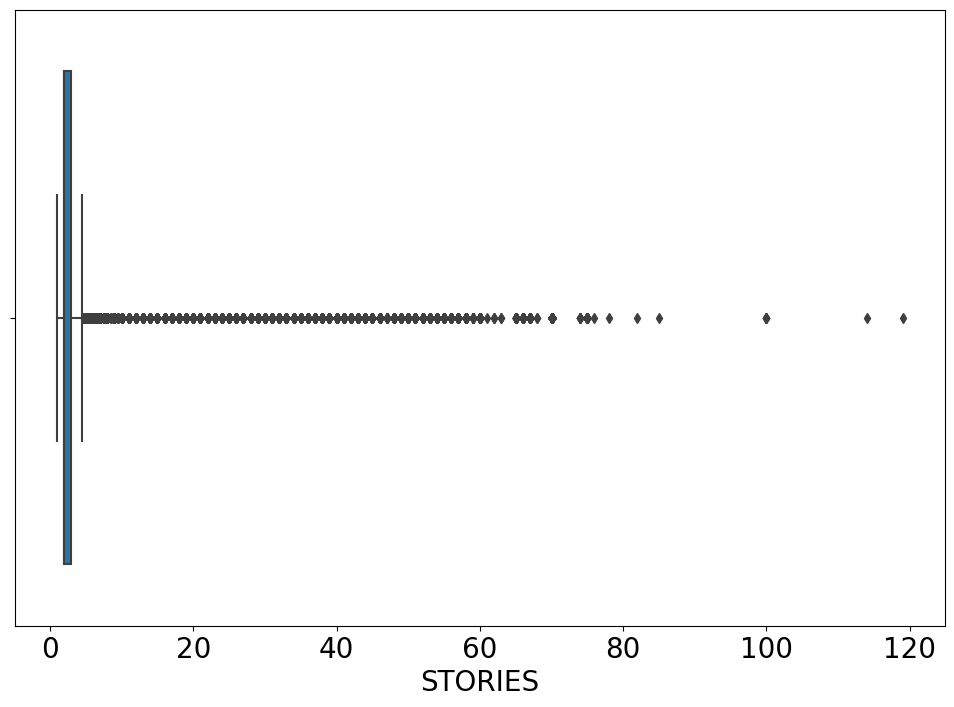

In [77]:
sns.boxplot(x='STORIES', data=data)

In [78]:
len(data[data['STORIES'] == 0])

0

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STORIES', ylabel='Density'>

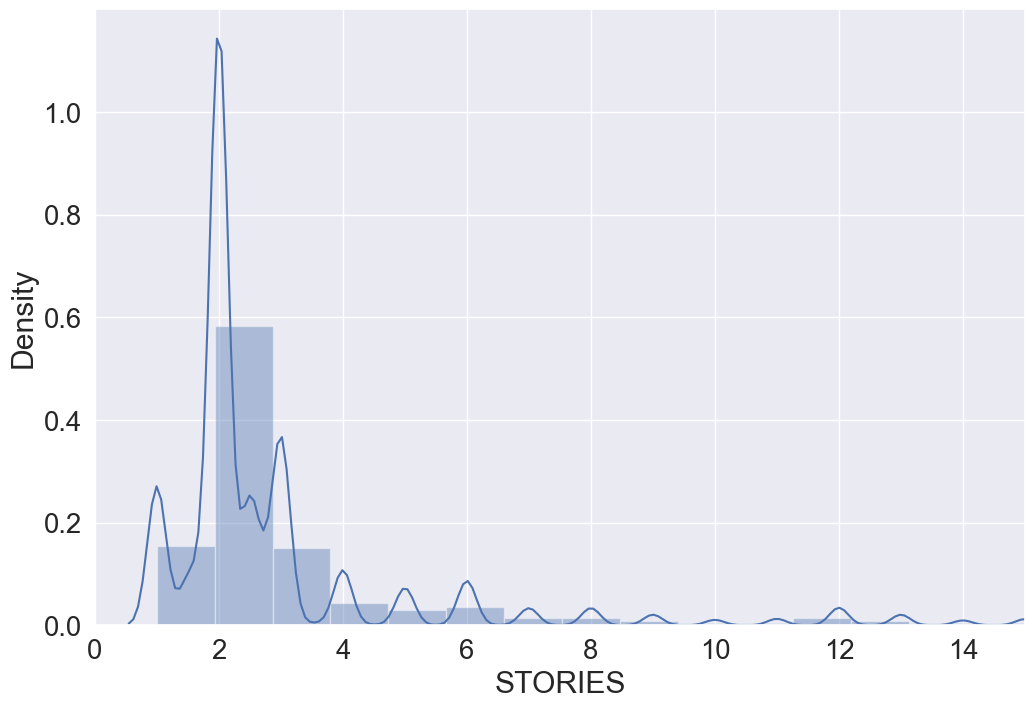

In [258]:
xhigh = 15
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(0,xhigh)
temp = temp[temp['STORIES'] <= xhigh]
sns.distplot(temp['STORIES'],bins=15, kde=True)

In [80]:
len(data[data['STORIES'] == 1])

96706

In [81]:
data['STORIES'].value_counts()

2.0      415092
3.0      130127
1.0       96706
2.5       82292
4.0       38342
          ...  
78.0          1
61.0          1
2.1           1
114.0         1
82.0          1
Name: STORIES, Length: 111, dtype: int64

In [82]:
data['FULLVAL'].count() * 100 / numrecords

100.0

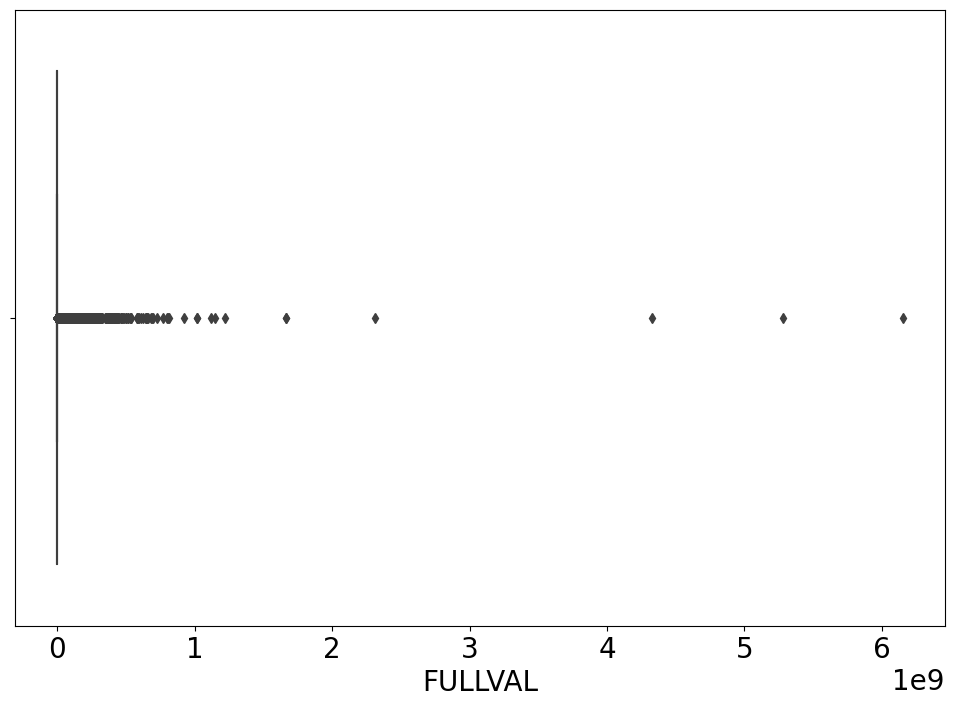

In [83]:
sns.boxplot(x='FULLVAL', data=data)
plt.savefig("boxplot.png")

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


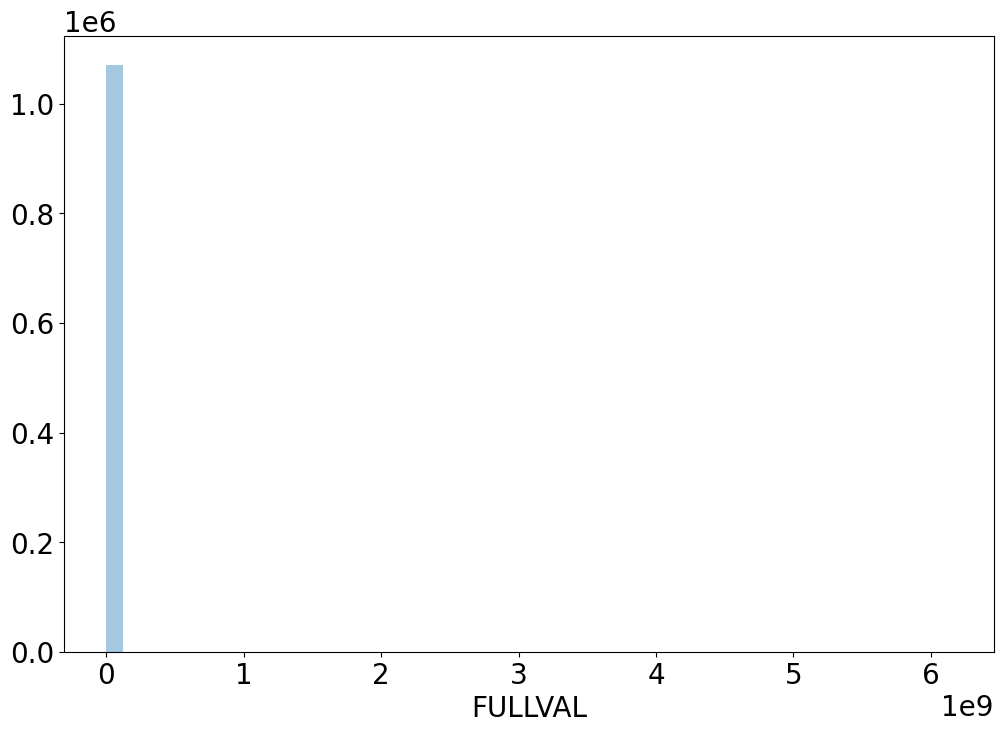

In [84]:
sns.distplot(data['FULLVAL'],kde=False)
plt.savefig('dist bad.png')

In [85]:
len(data[data['FULLVAL']==0])

13007

In [86]:
len(data[data['FULLVAL']==1])

0

In [87]:
len(data[data["FULLVAL"]==2])

0

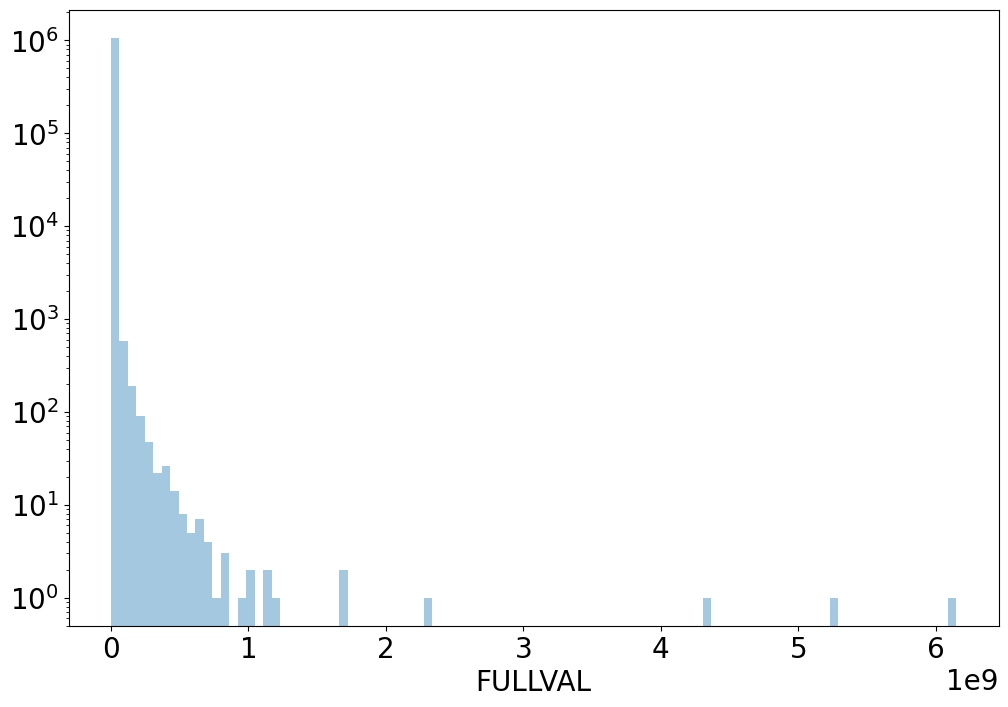

In [88]:
temp = data[data['FULLVAL'] >= 0]
ax = sns.distplot(temp['FULLVAL'],bins=100, kde=False)
ax.set_yscale('log')

<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

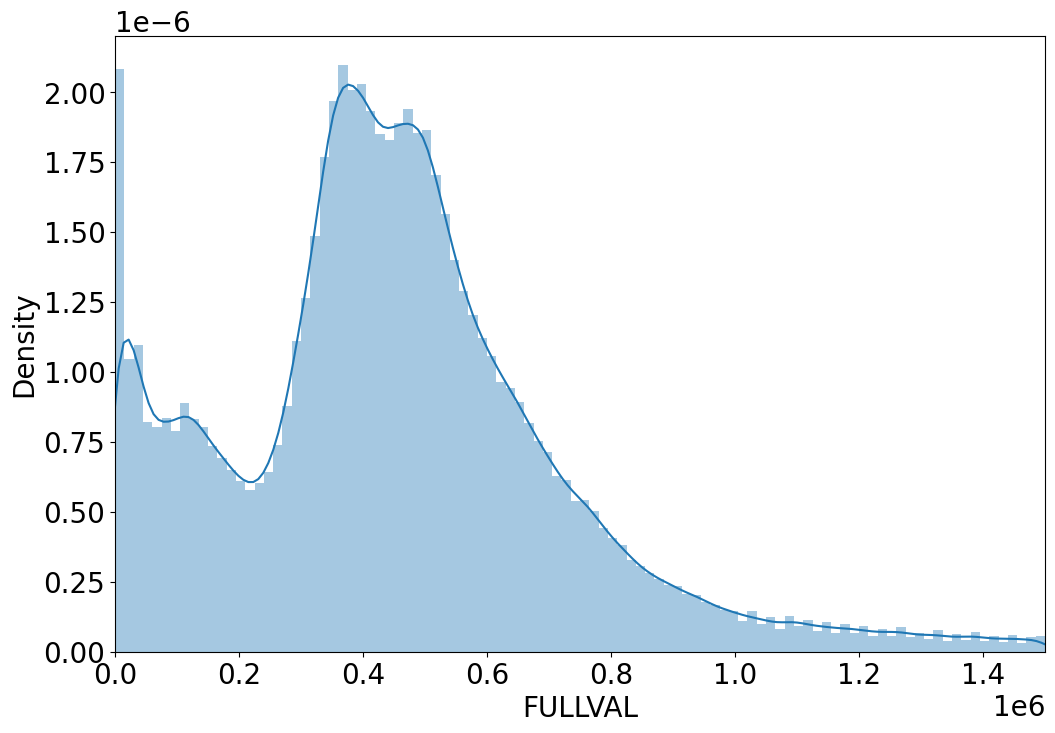

In [89]:
xhigh = 1500000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=True)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


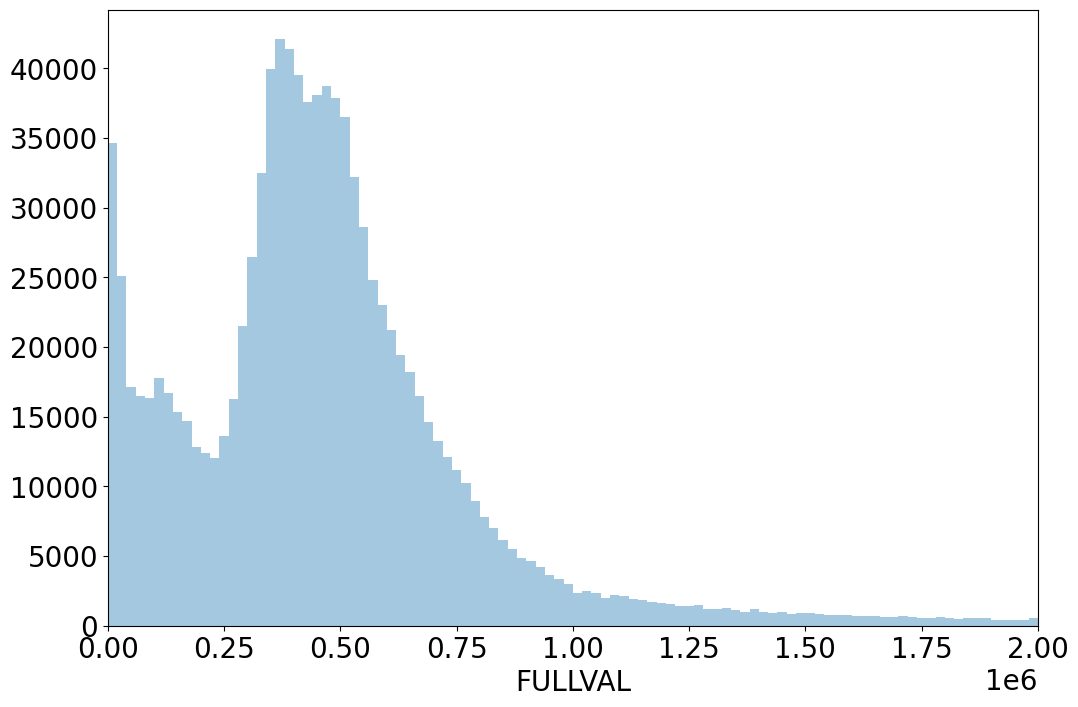

In [90]:
xhigh = 2000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)
plt.savefig('dist good.png')

<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

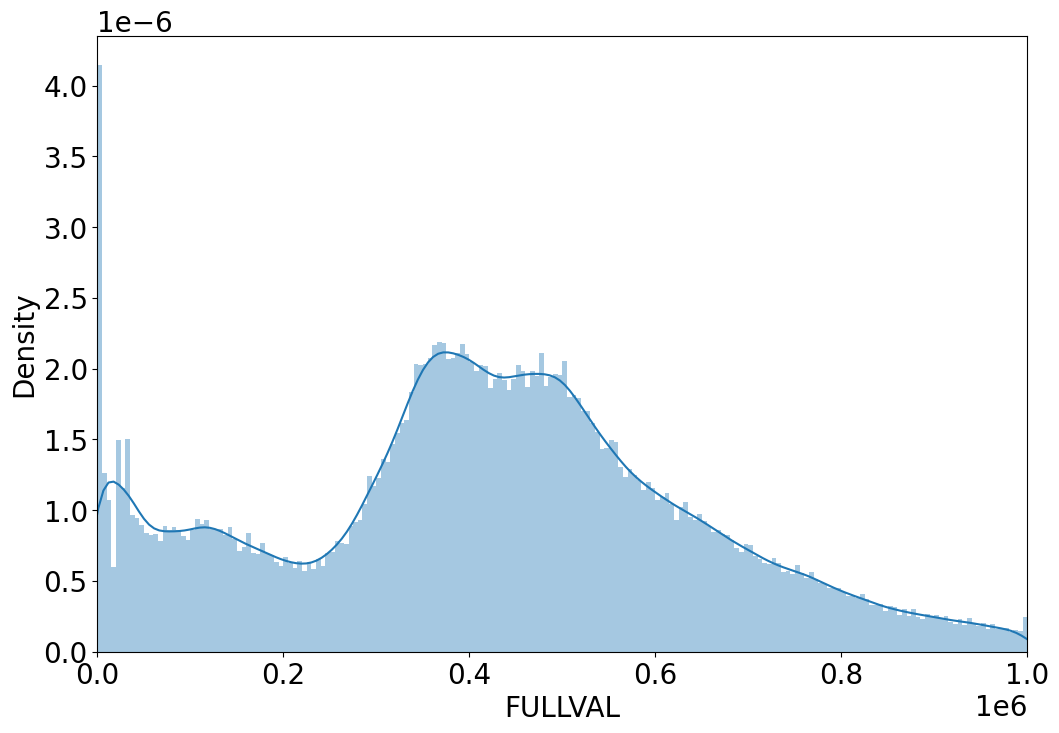

In [91]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=200, kde=True)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'market value')

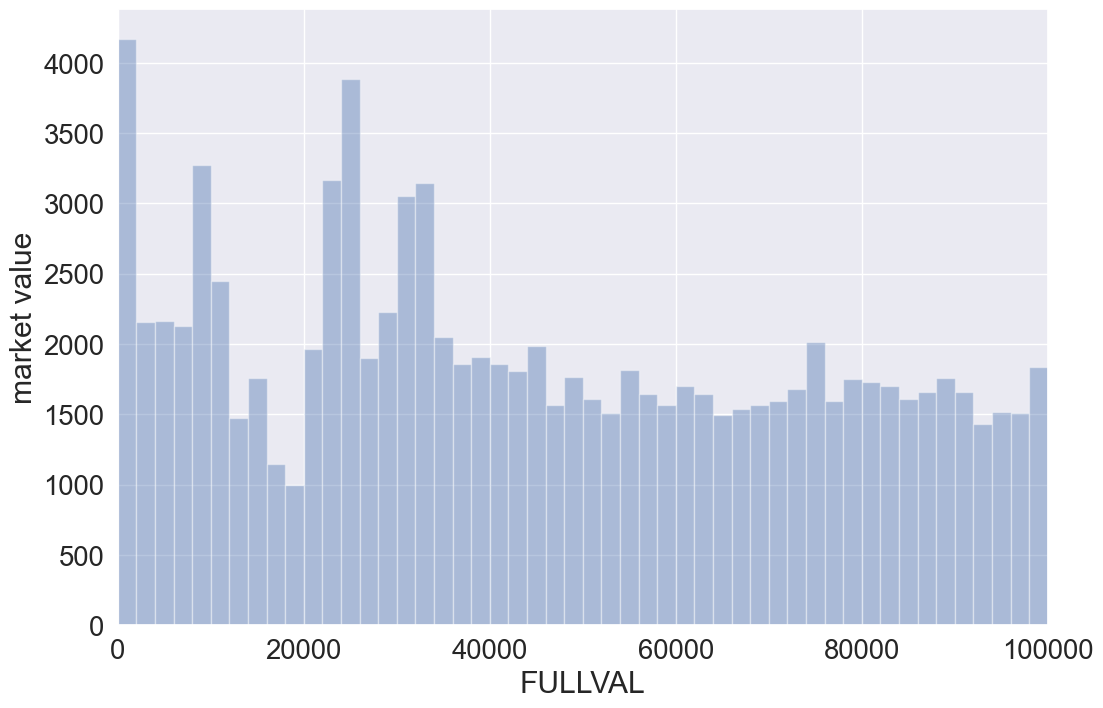

In [269]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[(data['FULLVAL'] <= xhigh) & (data['FULLVAL']) > 0]
sns.distplot(temp['FULLVAL'],bins=50, kde=False)
plt.ylabel("market value")

In [93]:
len(data[data['FULLVAL'] == 0])

13007

In [94]:
data['AVLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVLAND'>

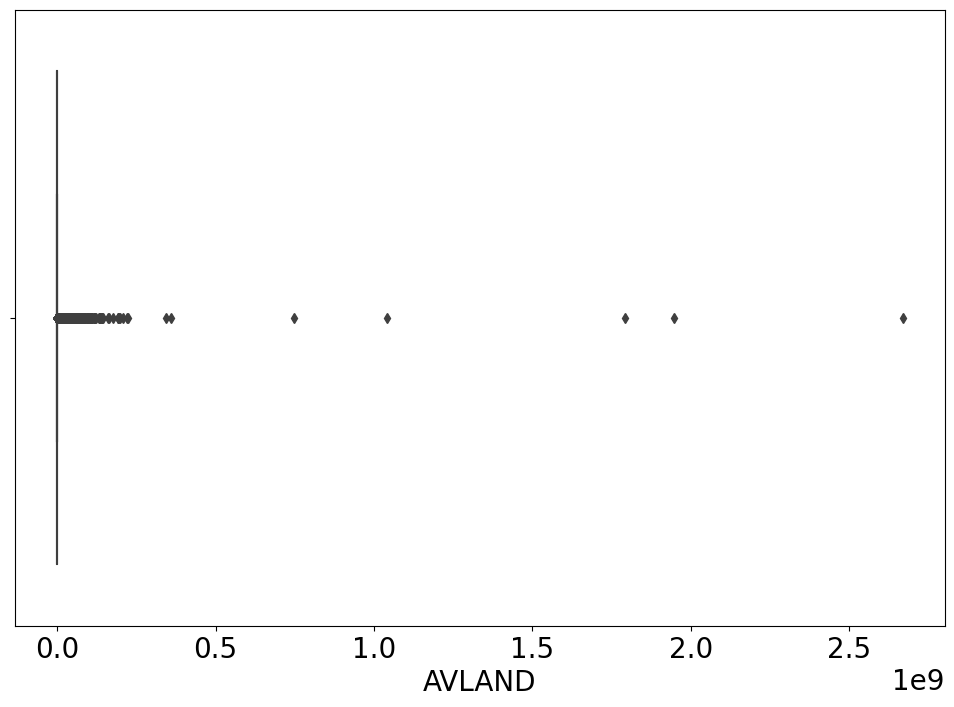

In [95]:
sns.boxplot(x='AVLAND', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVLAND'>

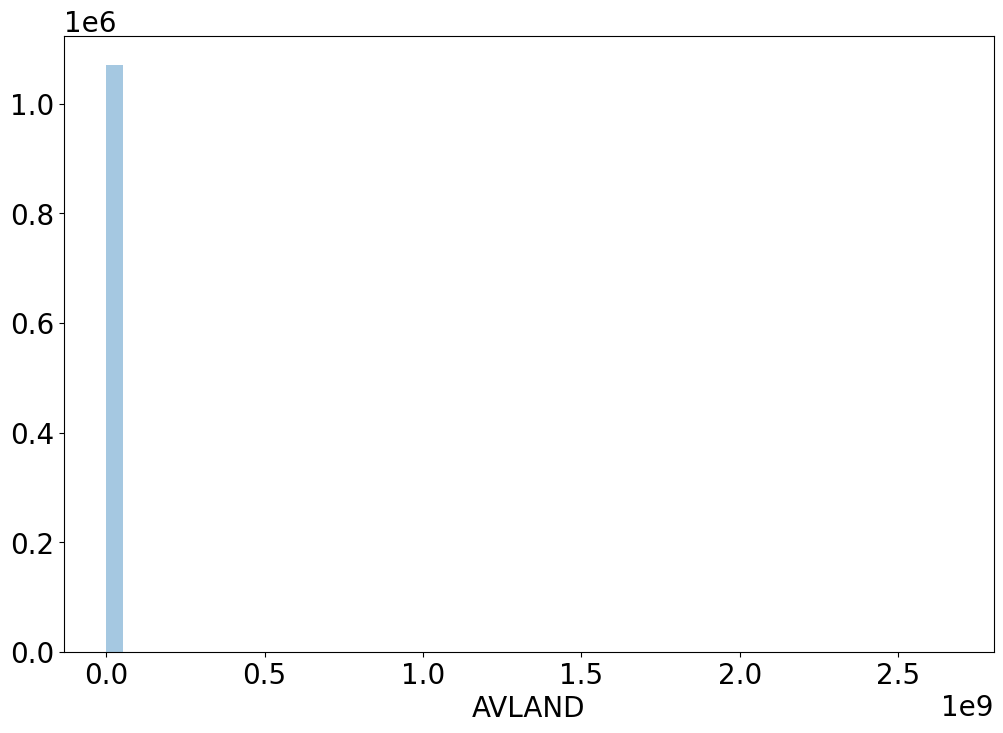

In [96]:
sns.distplot(data['AVLAND'],kde=False)

In [97]:
len(data[data['AVLAND']==0])

13009

In [98]:
len(data[data['AVLAND']==1])

3

In [99]:
len(data[data["AVLAND"]==2])

13

Text(0, 0.5, 'acutal land value')

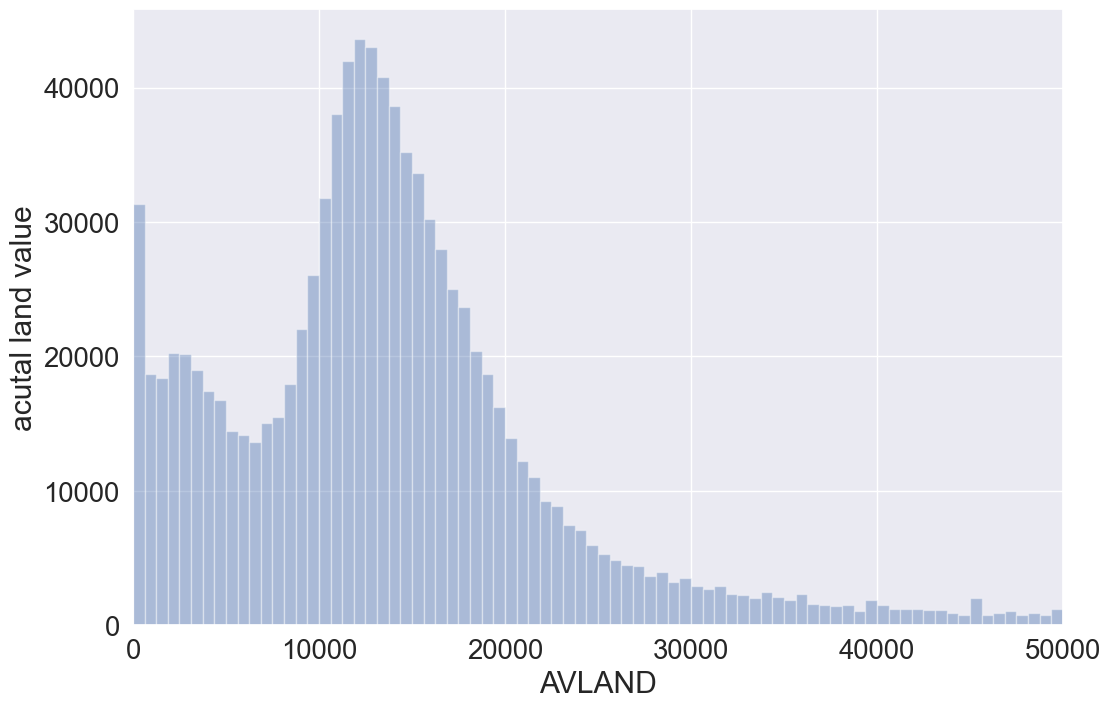

In [274]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.distplot(temp['AVLAND'],bins=80, kde= False)
plt.ylabel('acutal land value')

In [101]:
data['AVTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVTOT'>

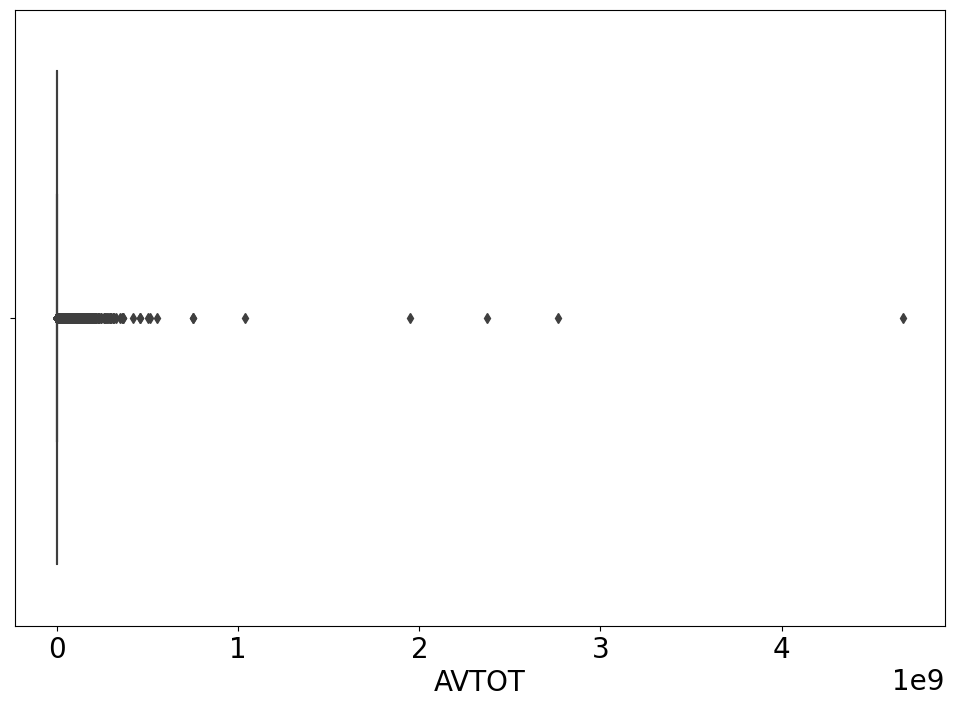

In [102]:
sns.boxplot(x='AVTOT', data=data)

Text(0, 0.5, 'acutal land value')

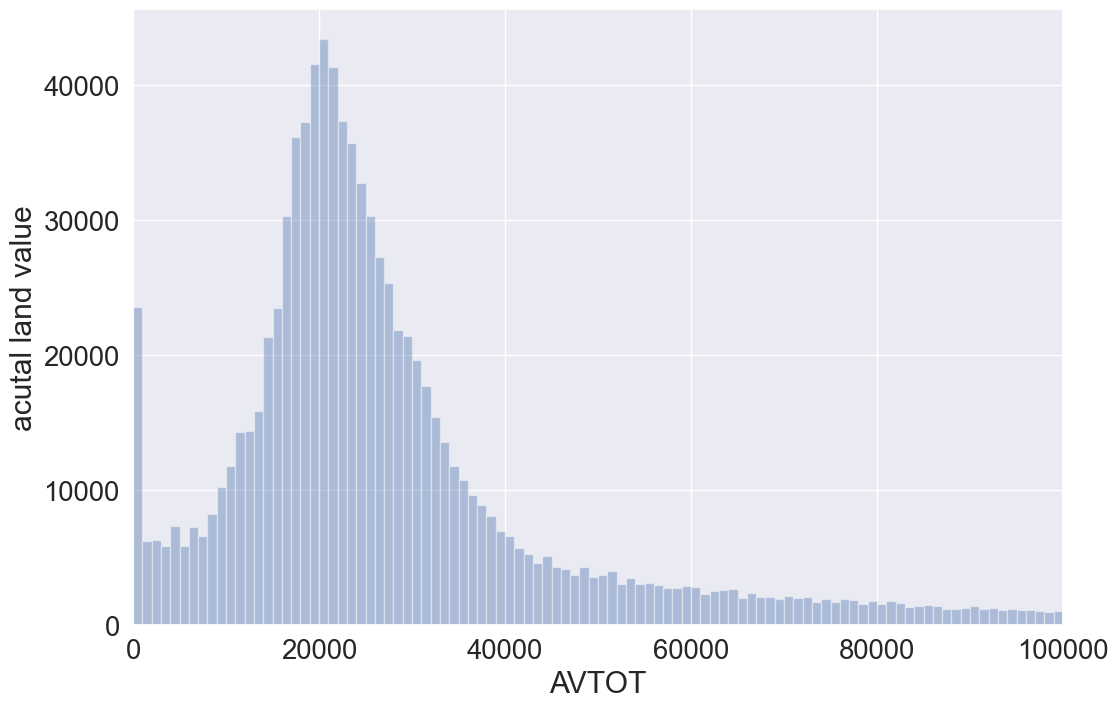

In [285]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.distplot(temp['AVTOT'],bins=100, kde=False)
plt.ylabel('acutal land value')

In [104]:
len(data[data['AVTOT']==0])

13007

In [105]:
len(data[data['AVTOT']==1])

3

In [106]:
len(data[data["AVTOT"]==2])

2

In [107]:
data['EXLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='EXLAND'>

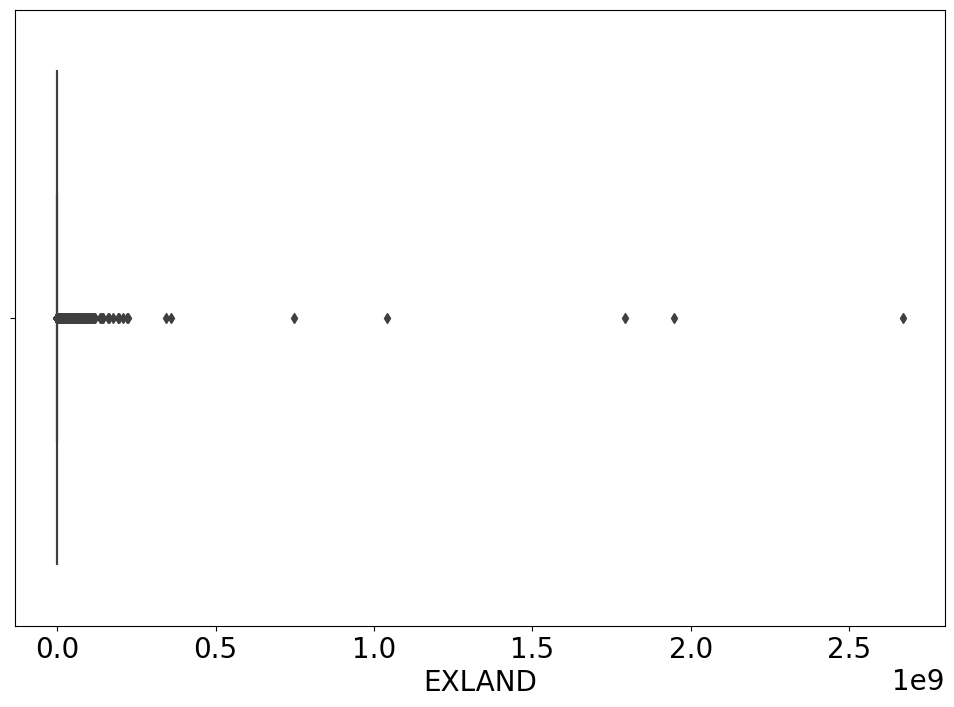

In [108]:
sns.boxplot(x='EXLAND', data=data)

<AxesSubplot:xlabel='EXLAND', ylabel='Density'>

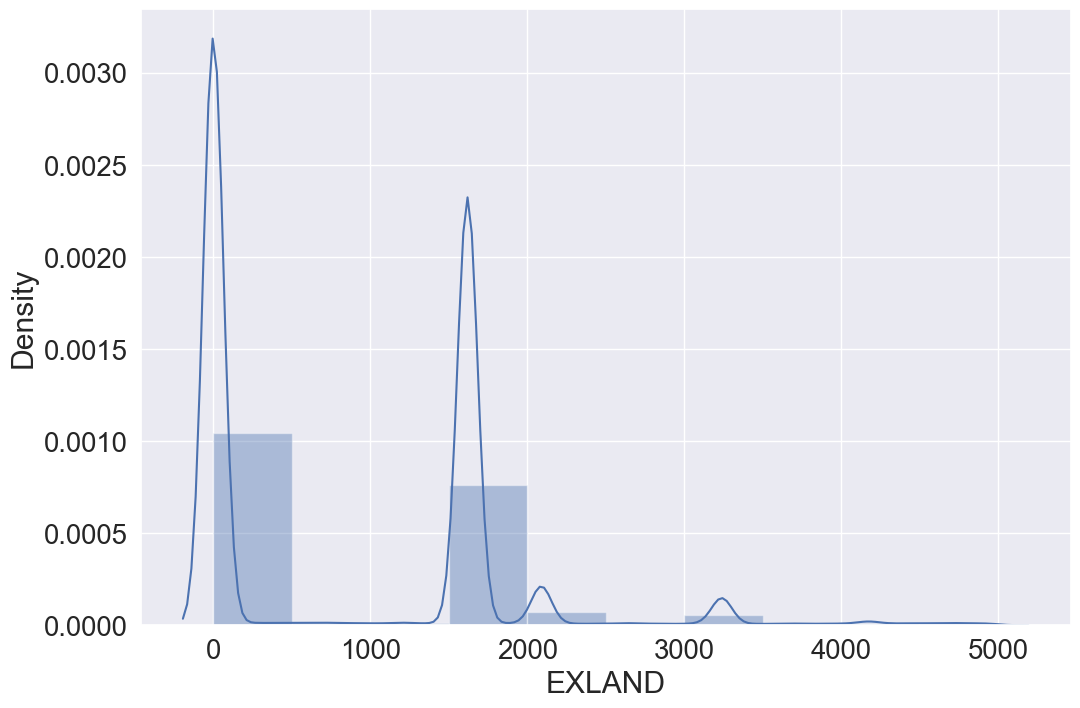

In [316]:
xhigh = 5000
#plt.xlim(0,xhigh)
temp = data[data['EXLAND'] <= xhigh] 
sns.distplot(temp['EXLAND'],bins=10, kde=True)

In [110]:
len(data[data['EXLAND']==0])

491699

In [111]:
len(data[data['EXLAND']==1])

8

In [112]:
len(data[data["EXLAND"]==2])

15

In [307]:
temp['EXLAND']

8             0.0
9             0.0
10            0.0
11            0.0
12            0.0
            ...  
1070988       0.0
1070989    1620.0
1070990    1620.0
1070992    1620.0
1070993    1620.0
Name: EXLAND, Length: 953389, dtype: float64

In [113]:
data['EXTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='EXTOT'>

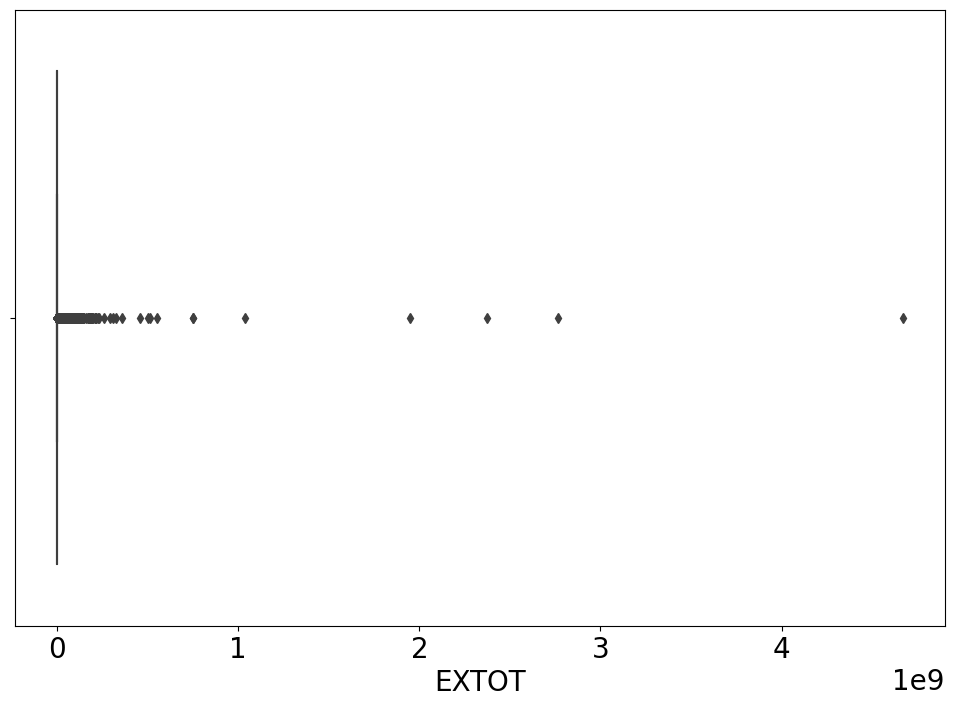

In [114]:
sns.boxplot(x='EXTOT', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXTOT', ylabel='Density'>

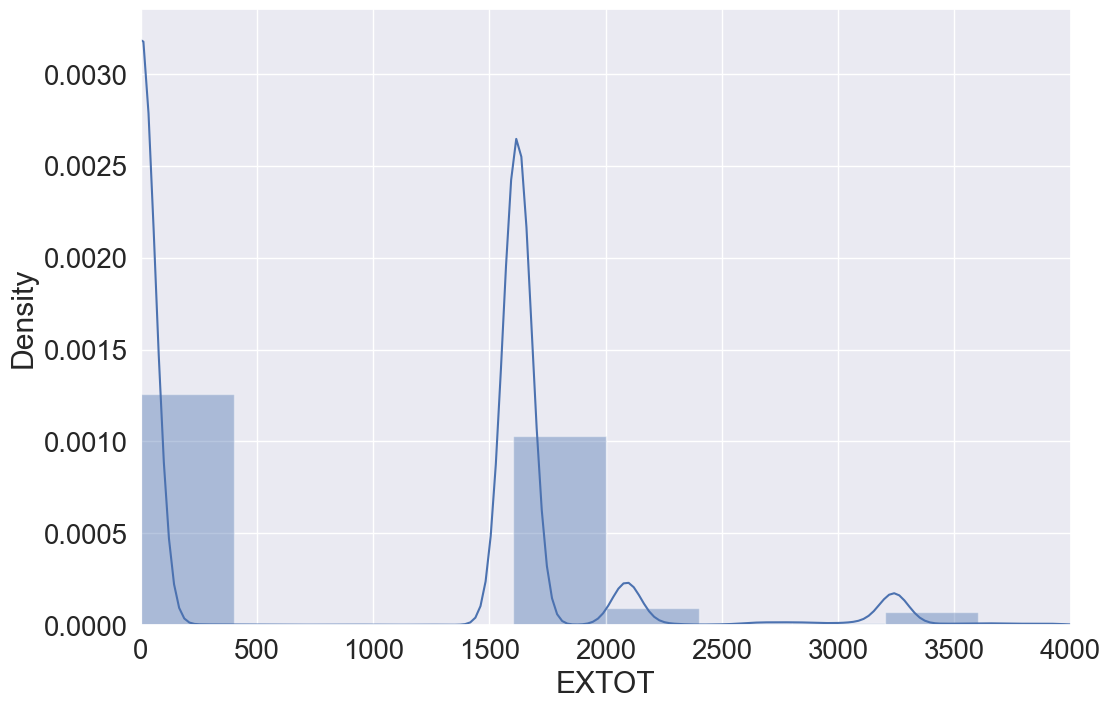

In [317]:
xhigh = 4000
plt.xlim(0,xhigh)
temp = data[data['EXTOT'] <= xhigh]
sns.distplot(temp['EXTOT'],bins=10, kde=True)

In [116]:
len(data[data['EXTOT']==0])

432572

In [117]:
len(data[data['EXTOT']==1])

10

In [118]:
len(data[data["EXTOT"]==2])

2

In [119]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

<AxesSubplot:xlabel='EXCD1'>

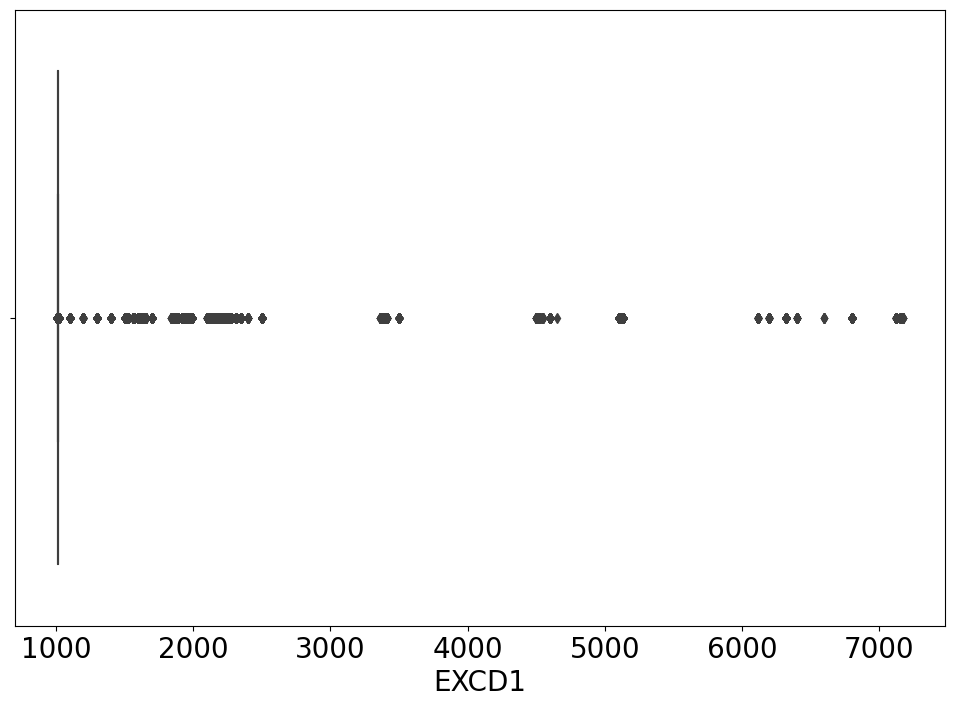

In [120]:
sns.boxplot(x='EXCD1', data=data)

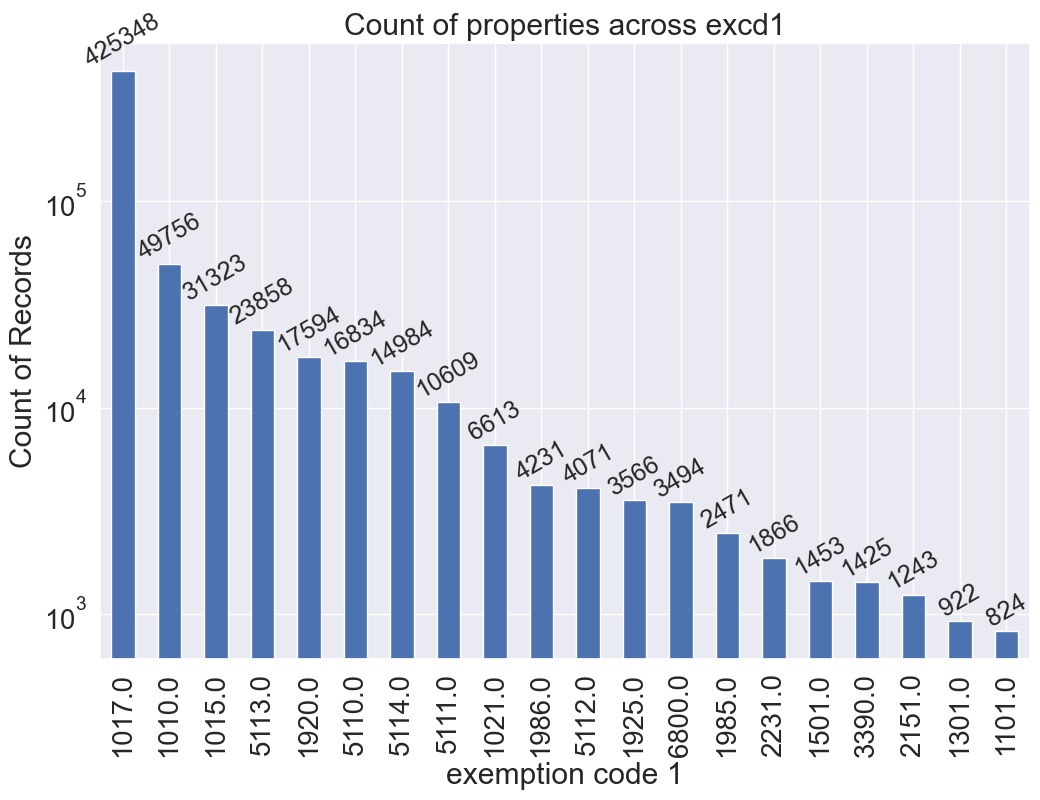

In [332]:
own = data['EXCD1'].value_counts().head(20)

data['EXCD1'].value_counts().head(20).plot(kind='bar', logy = True)
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("exemption code 1")
plt.ylabel("Count of Records")
plt.title('Count of properties across excd1')
plt.savefig('plot.jpeg')

In [122]:
len(data[data['EXCD1']==0])

0

In [123]:
len(data[data['EXCD1']==1])

0

In [124]:
len(data[data["EXCD1"]==2])

0

In [125]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [126]:
len(data['STADDR'].unique())

839281

In [127]:
data['STADDR'].value_counts()

501 SURF AVENUE       902
330 EAST 38 STREET    817
322 WEST 57 STREET    720
155 WEST 68 STREET    671
20 WEST 64 STREET     657
                     ... 
1349 55 STREET          1
1347 55 STREET          1
1345 55 STREET          1
1343 55 STREET          1
162 BENTLEY STREET      1
Name: STADDR, Length: 839280, dtype: int64

<AxesSubplot:>

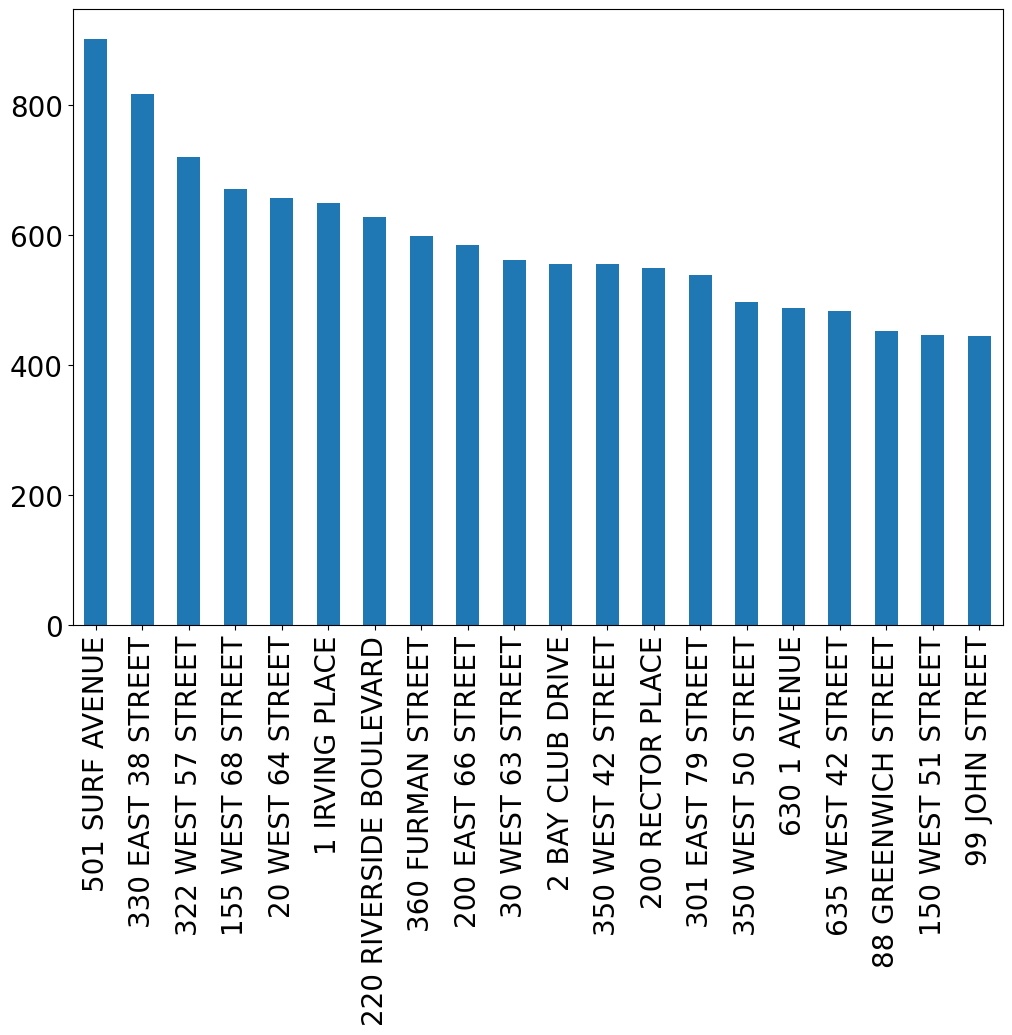

In [128]:
data['STADDR'].value_counts().head(20).plot(kind='bar')

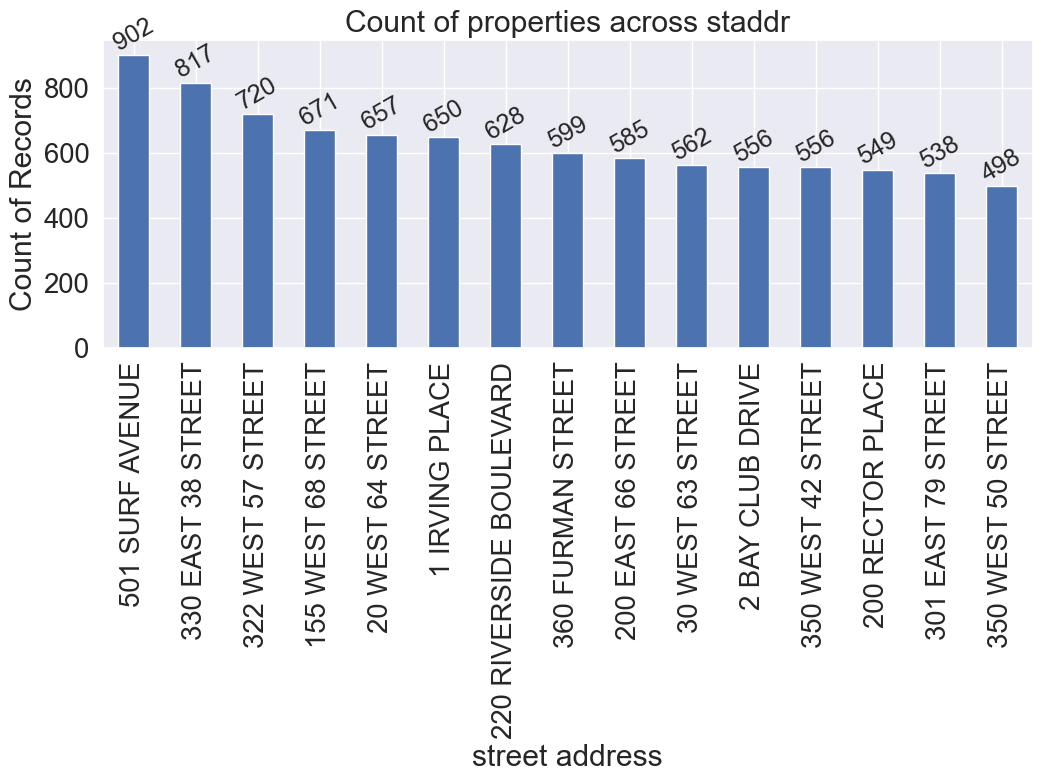

In [339]:
own = data['STADDR'].value_counts().head(15)

data['STADDR'].value_counts().head(15).plot(kind='bar', logy = False)
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,16)})
plt.xlabel("street address")
plt.ylabel("Count of Records")
plt.title('Count of properties across staddr')
plt.savefig('plot.jpeg')

In [129]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [130]:
len(data['ZIP'].unique())

197

In [131]:
data['ZIP'].value_counts()

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
           ...  
11359.0        1
11005.0        1
10162.0        1
11352.0        1
11241.0        1
Name: ZIP, Length: 196, dtype: int64

<AxesSubplot:>

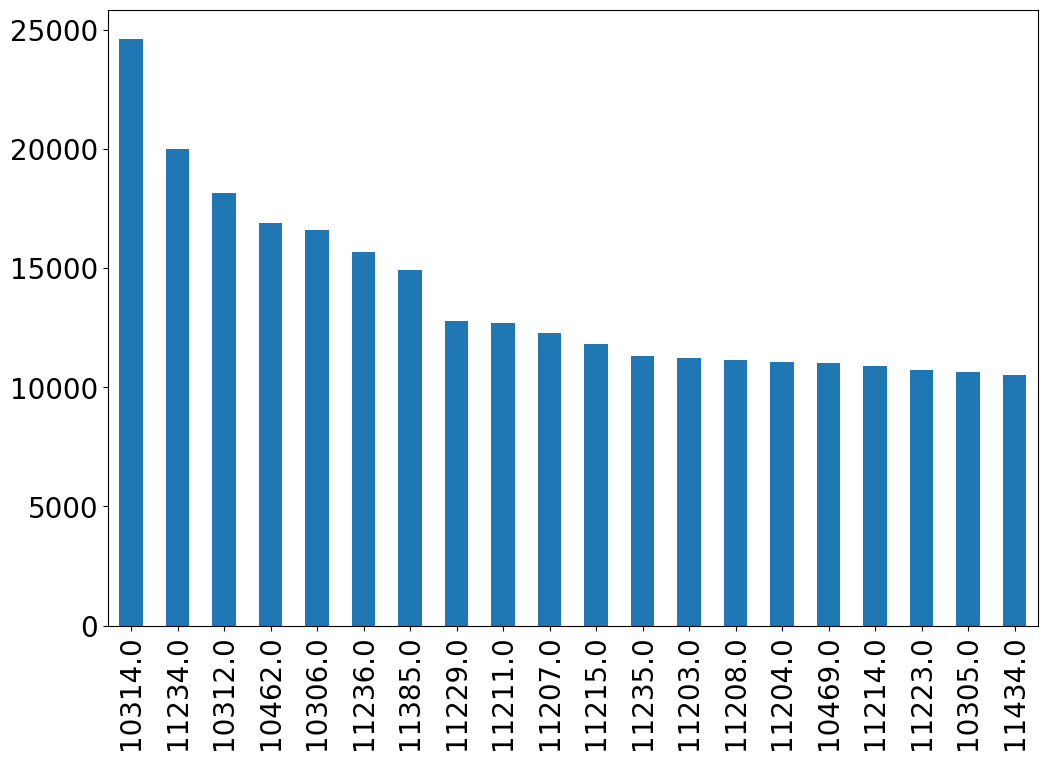

In [132]:
data['ZIP'].value_counts().head(20).plot(kind='bar')

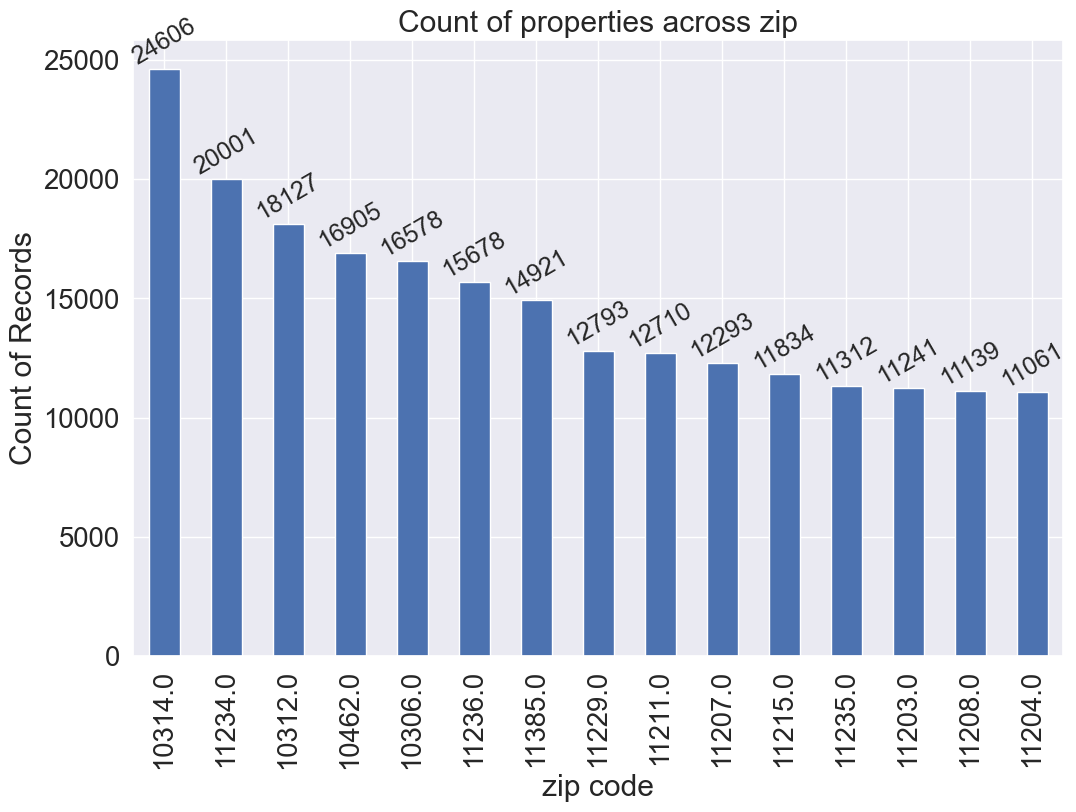

In [337]:
own = data['ZIP'].value_counts().head(15)

data['ZIP'].value_counts().head(15).plot(kind='bar', logy = False)
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("zip code")
plt.ylabel("Count of Records")
plt.title('Count of properties across zip')
plt.savefig('plot.jpeg')

In [133]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [134]:
len(data['EXMPTCL'].unique())

15

In [135]:
data['EXMPTCL'].value_counts()

X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
VI       1
KI       1
A9       1
R4       1
5        1
Name: EXMPTCL, dtype: int64

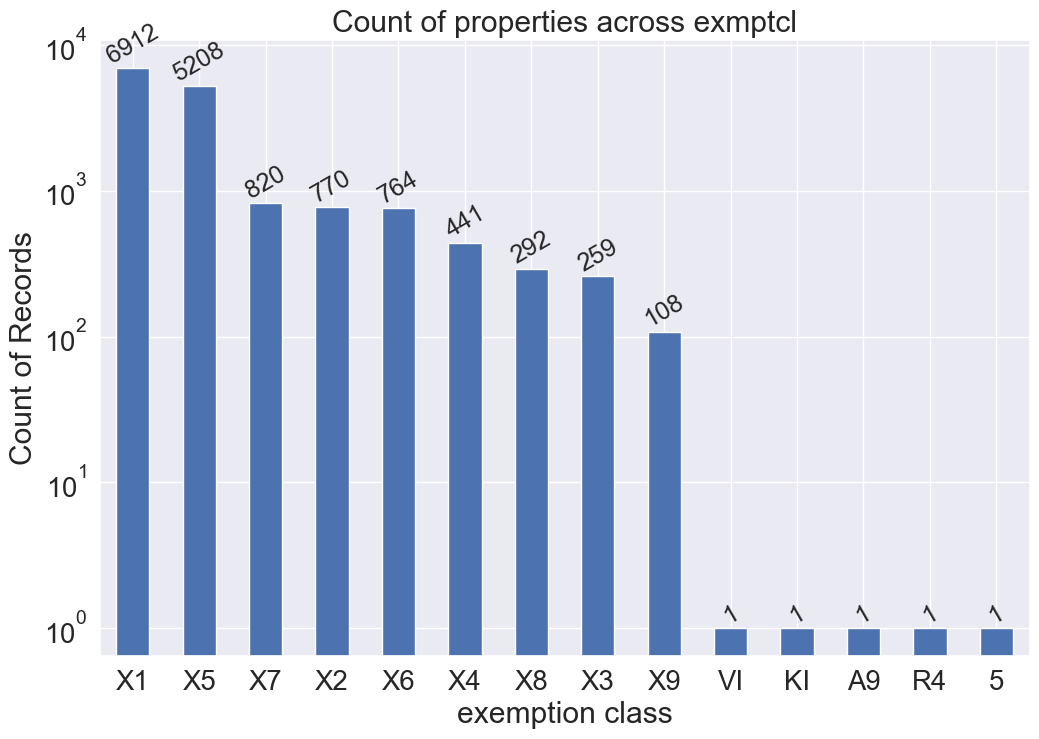

In [343]:
own = data['EXMPTCL'].value_counts()

data['EXMPTCL'].value_counts().plot(kind='bar', logy = True)
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("exemption class")
plt.ylabel("Count of Records")
plt.title('Count of properties across exmptcl')
plt.xticks(rotation=0)
plt.savefig('plot.jpeg')

<AxesSubplot:xlabel='BLDFRONT'>

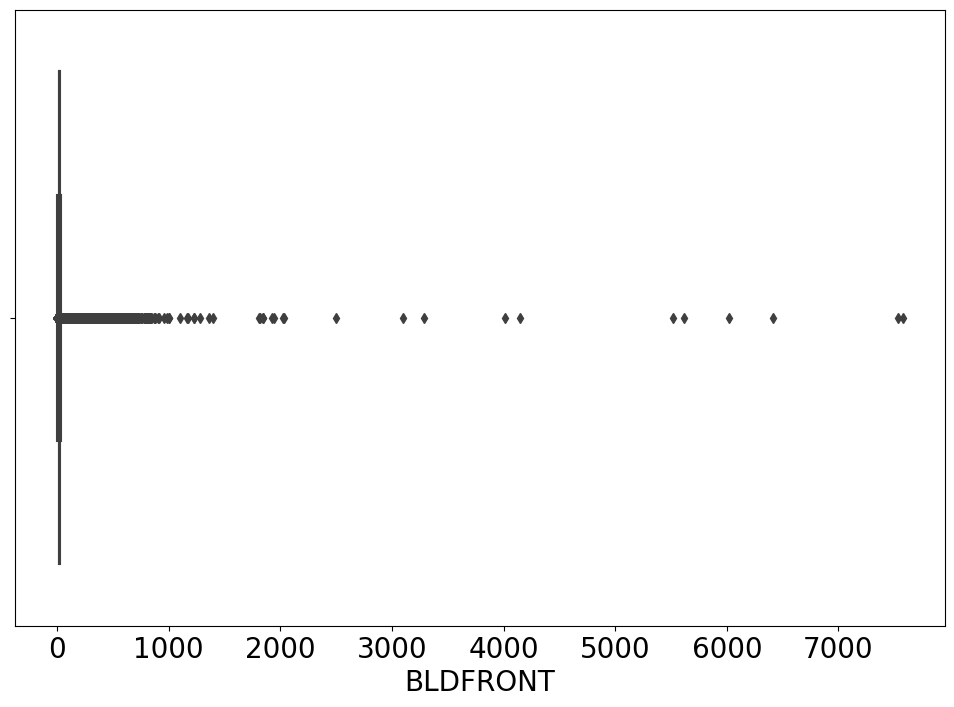

In [137]:
sns.boxplot(x='BLDFRONT', data=data)

<AxesSubplot:xlabel='BLDFRONT', ylabel='Density'>

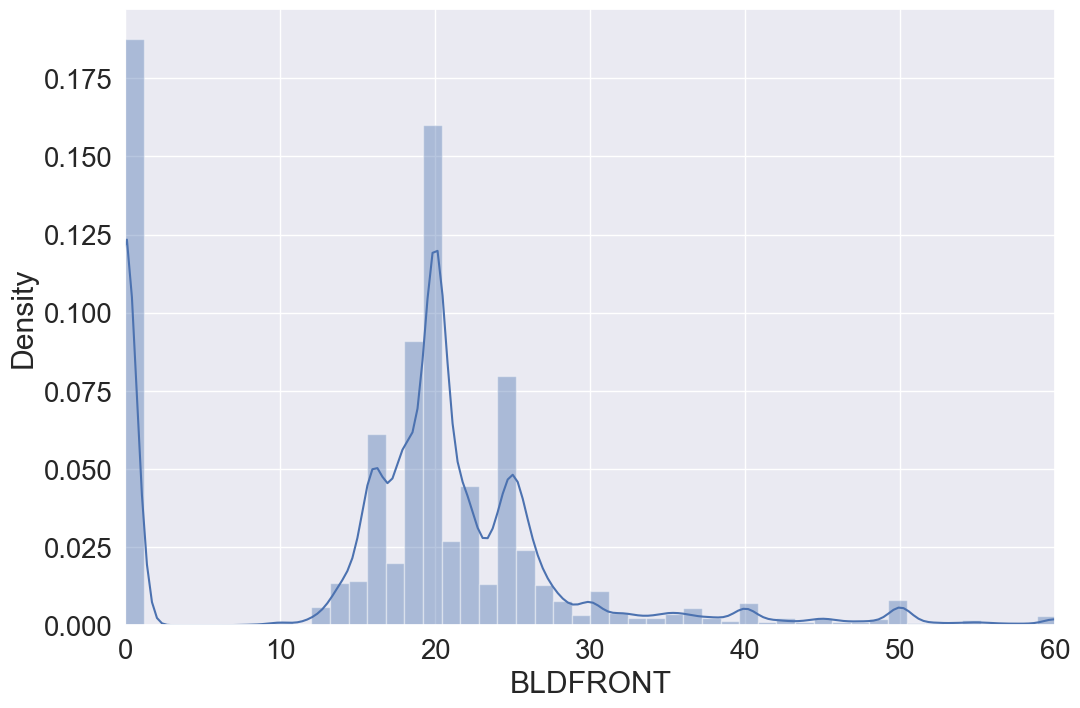

In [349]:
#look at the most relevant range
xhigh = 60
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=50, kde=True)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

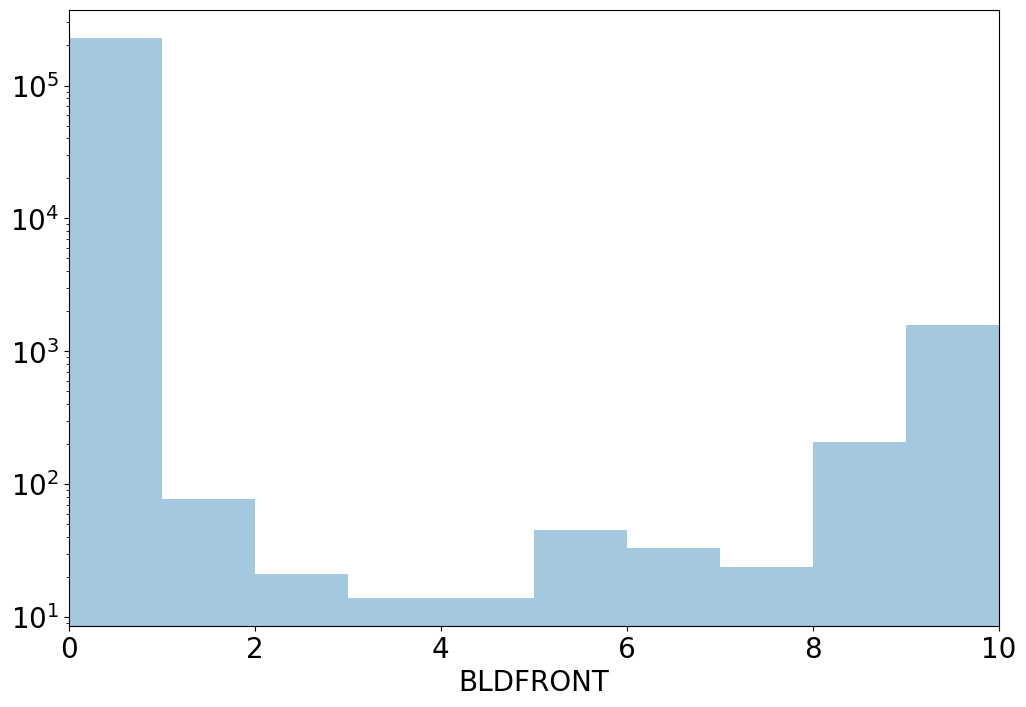

In [139]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDDEPTH'>

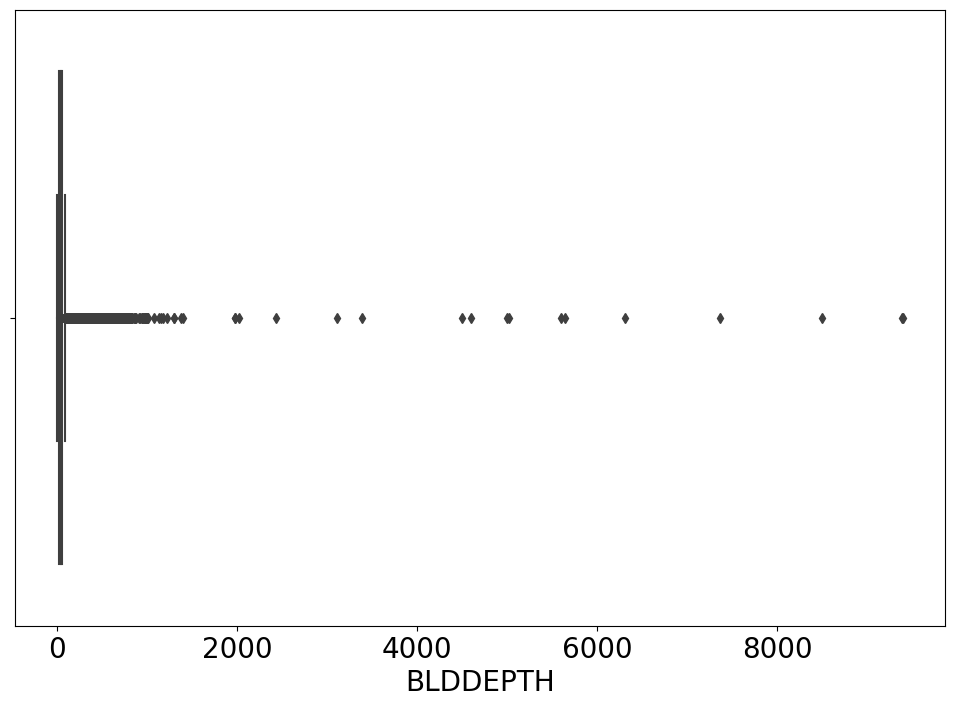

In [140]:
sns.boxplot(x='BLDDEPTH', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH', ylabel='Density'>

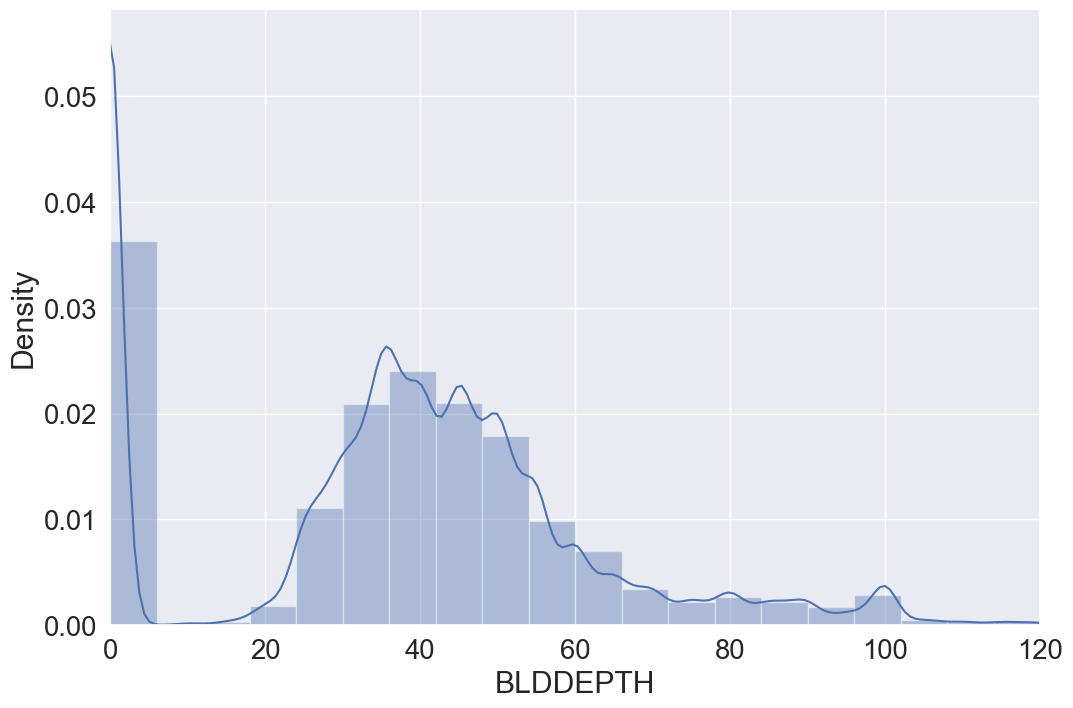

In [355]:
#look at the most relevant range
xhigh = 120
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=20, kde=True)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

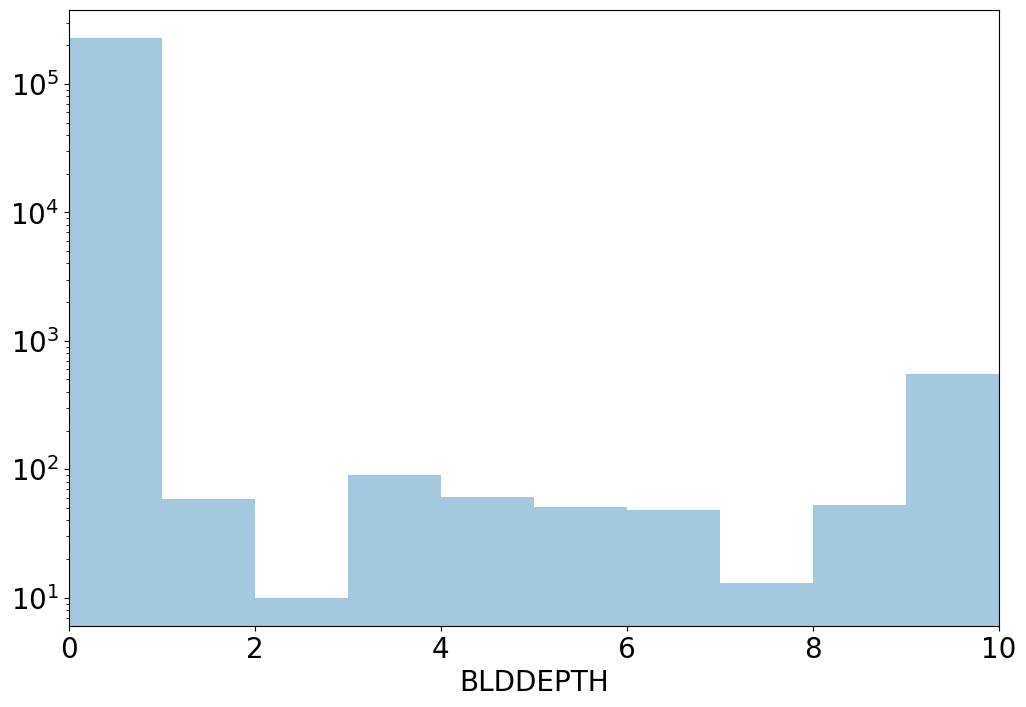

In [142]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDDEPTH'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDFRONT'>

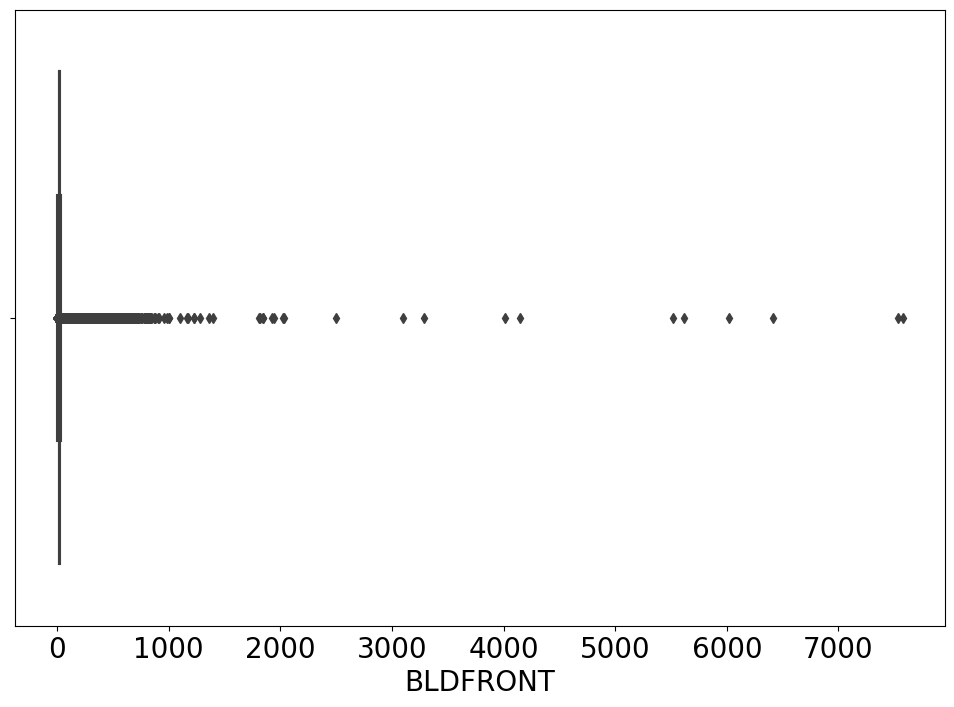

In [143]:
sns.boxplot(x='BLDFRONT', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

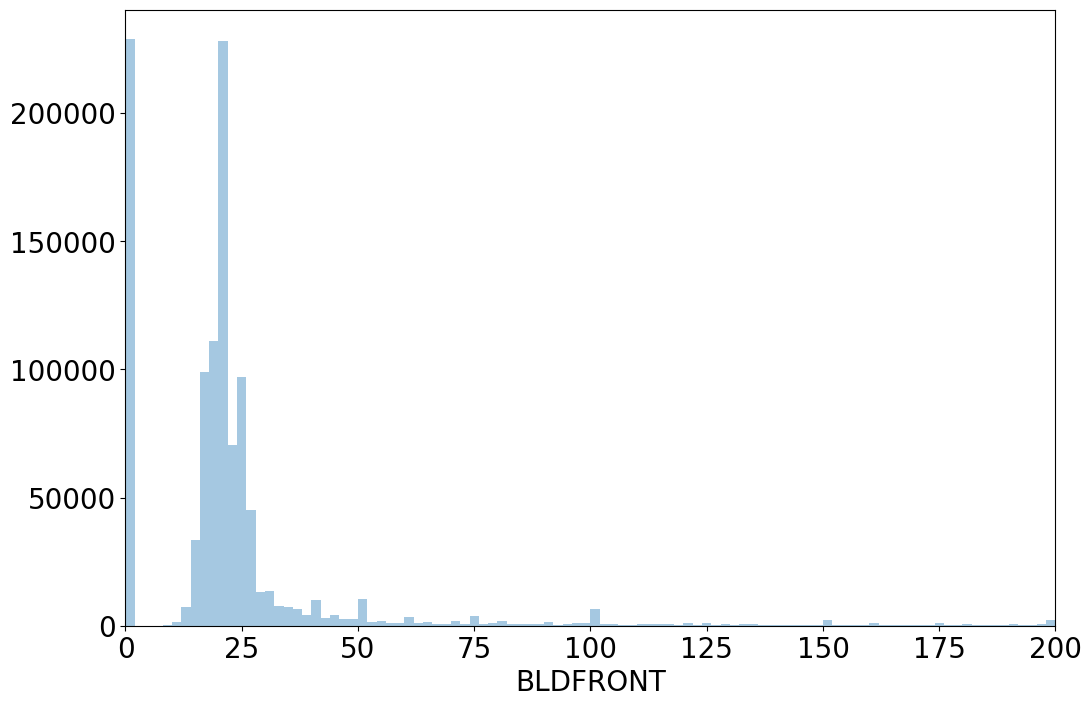

In [144]:
xhigh = 200
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=False)

In [145]:
len(data[data['BLDFRONT']==0])

228815

In [146]:
len(data[data['BLDFRONT']==1])

77

In [147]:
len(data[data["BLDFRONT"]==2])

21

In [148]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='BLDDEPTH'>

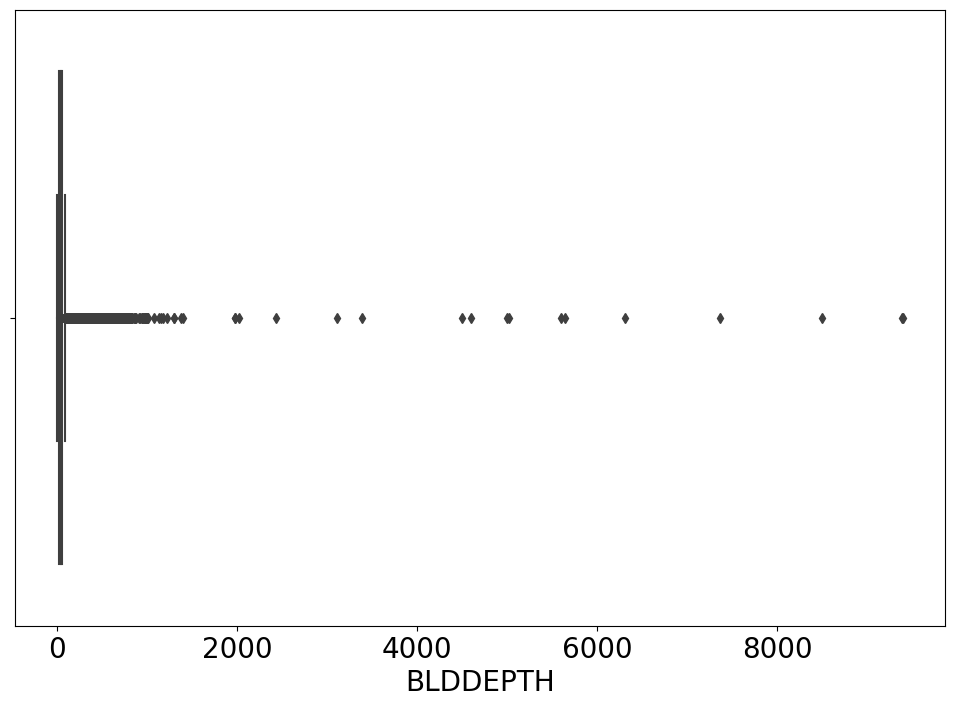

In [149]:
sns.boxplot(x='BLDDEPTH', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

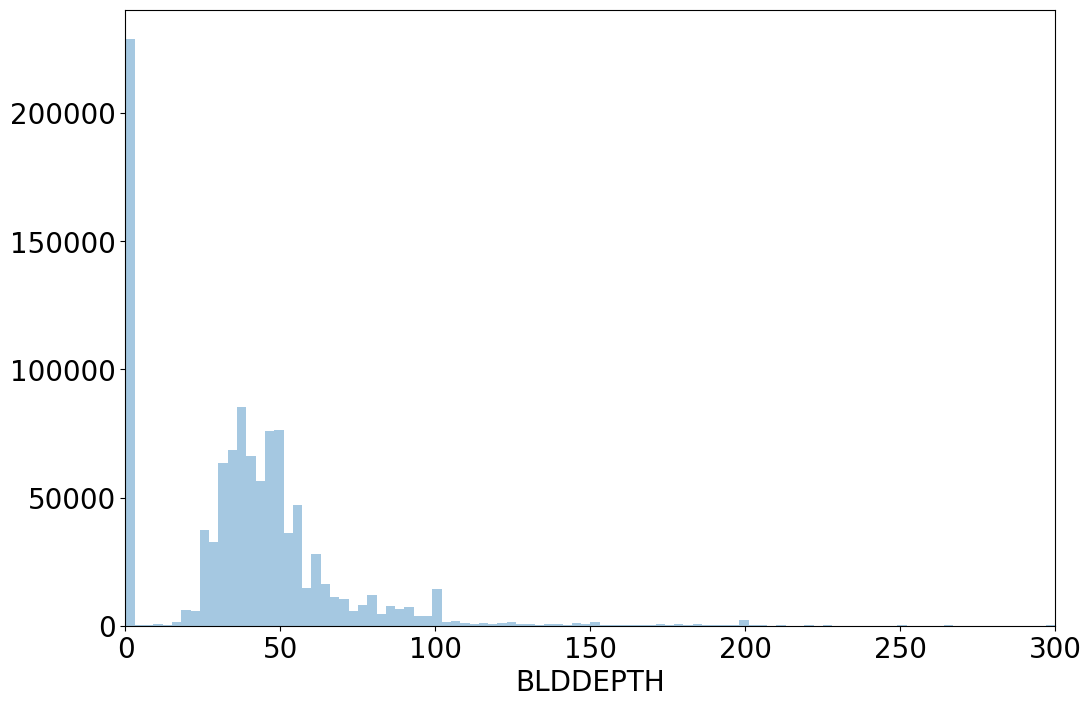

In [150]:
xhigh = 300
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100, kde=False)

In [151]:
len(data[data['BLDDEPTH']==0])

228853

In [152]:
len(data[data['BLDDEPTH']==1])

59

In [153]:
len(data[data["BLDDEPTH"]==2])

10

In [154]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

<AxesSubplot:xlabel='AVLAND2'>

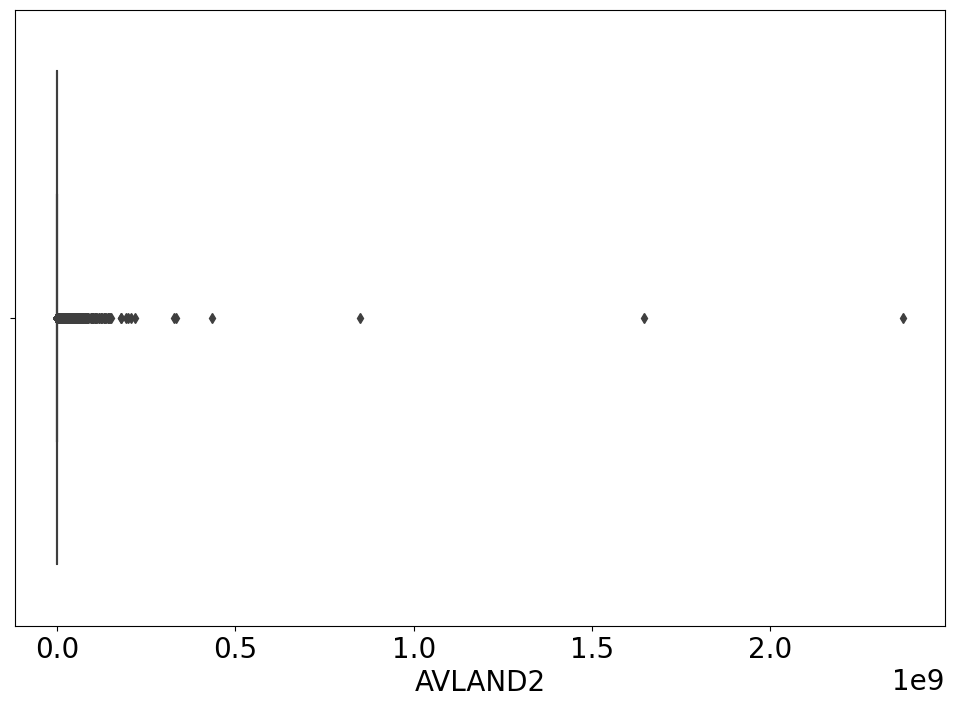

In [155]:
sns.boxplot(x='AVLAND2', data=data)

<AxesSubplot:xlabel='AVLAND2', ylabel='count'>

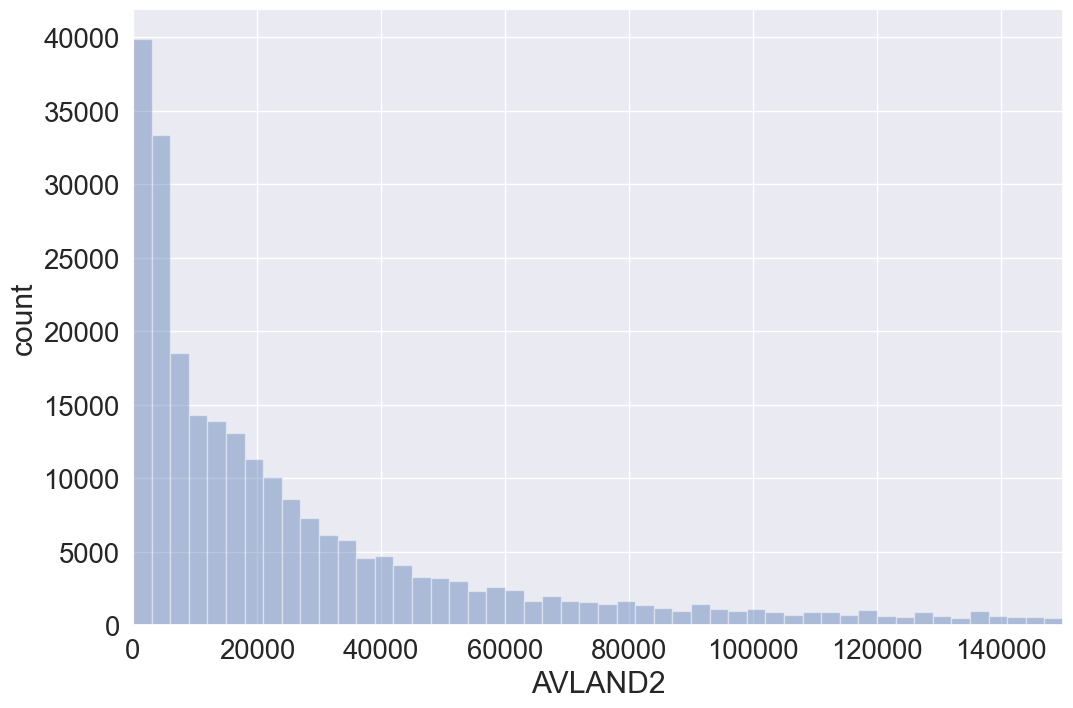

In [366]:
xhigh = 150000
plt.xlim(0,xhigh)
plt.ylabel("count")
temp = data[data['AVLAND2'] <= xhigh]
sns.distplot(temp['AVLAND2'],bins=50, kde=False)


In [367]:
temp['AVLAND2'].value_counts()

2408.0     767
2233.0     610
45000.0    597
750.0      547
90000.0    511
          ... 
62374.0      1
20321.0      1
17993.0      1
38663.0      1
37857.0      1
Name: AVLAND2, Length: 46668, dtype: int64

In [157]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

<AxesSubplot:xlabel='AVTOT2'>

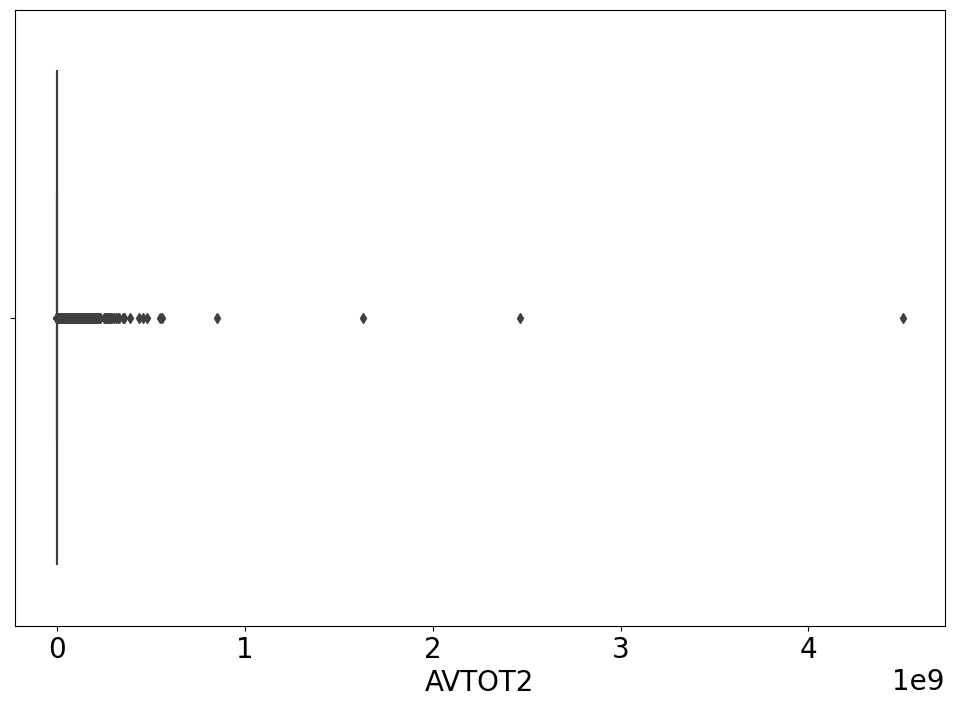

In [158]:
sns.boxplot(x='AVTOT2', data=data)

<AxesSubplot:xlabel='AVTOT2', ylabel='count'>

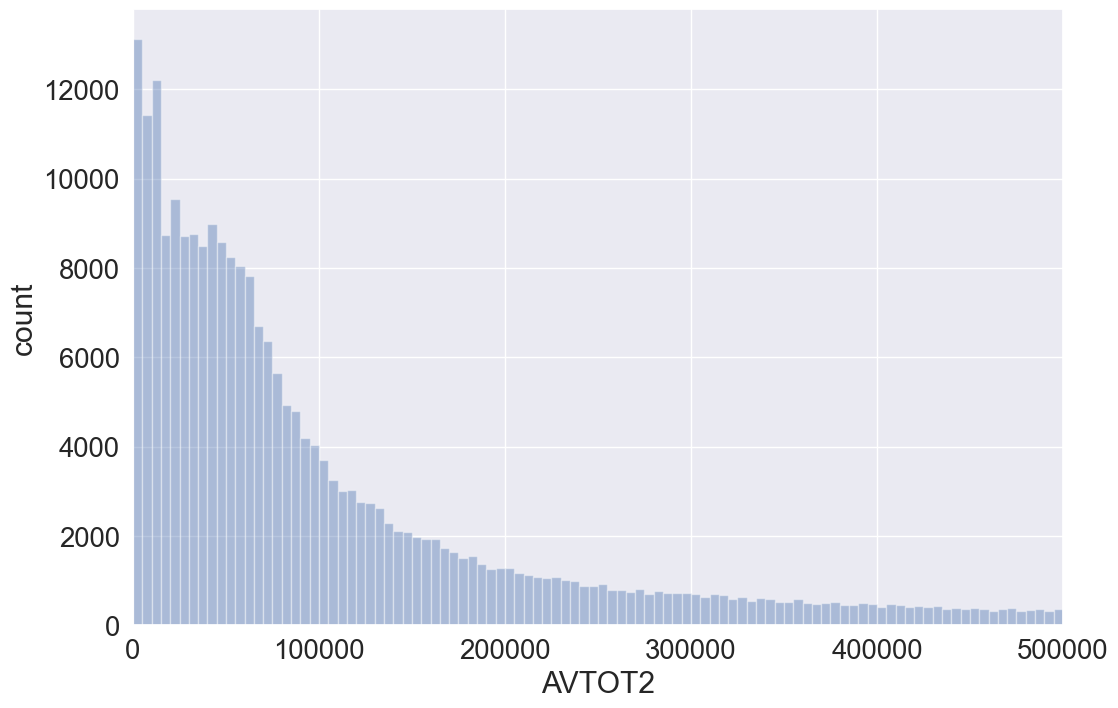

In [369]:
xhigh = 500000
plt.xlim(0,xhigh)
plt.ylabel("count")
temp = data[data['AVTOT2'] <= xhigh]
sns.distplot(temp['AVTOT2'],bins=100, kde=False)

In [160]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

<AxesSubplot:xlabel='EXLAND2'>

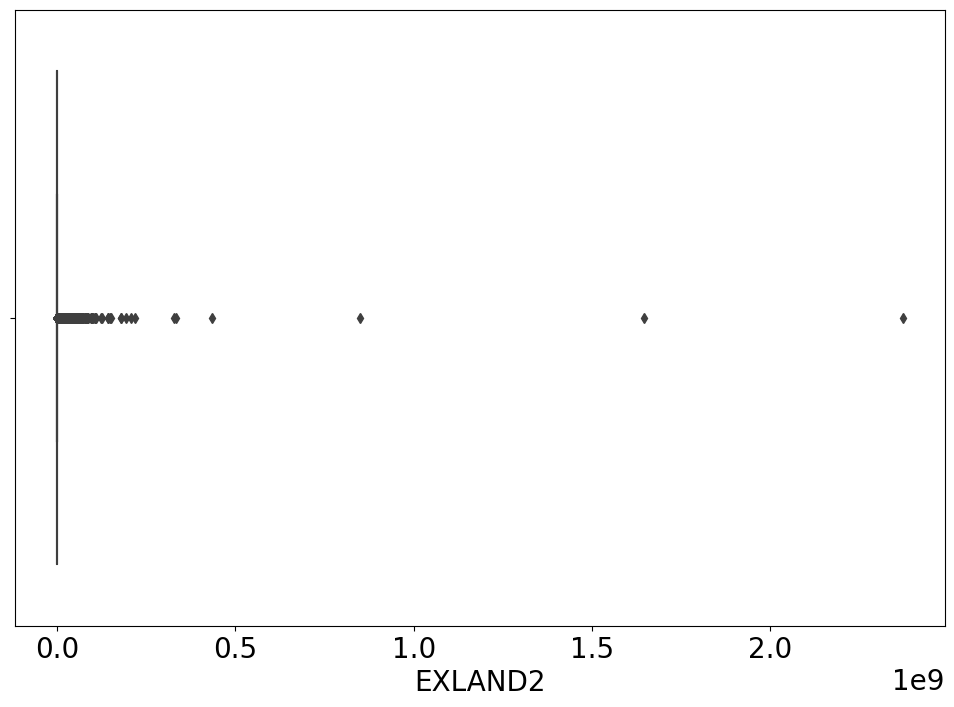

In [161]:
sns.boxplot(x='EXLAND2', data =data)

<AxesSubplot:xlabel='EXLAND2', ylabel='Density'>

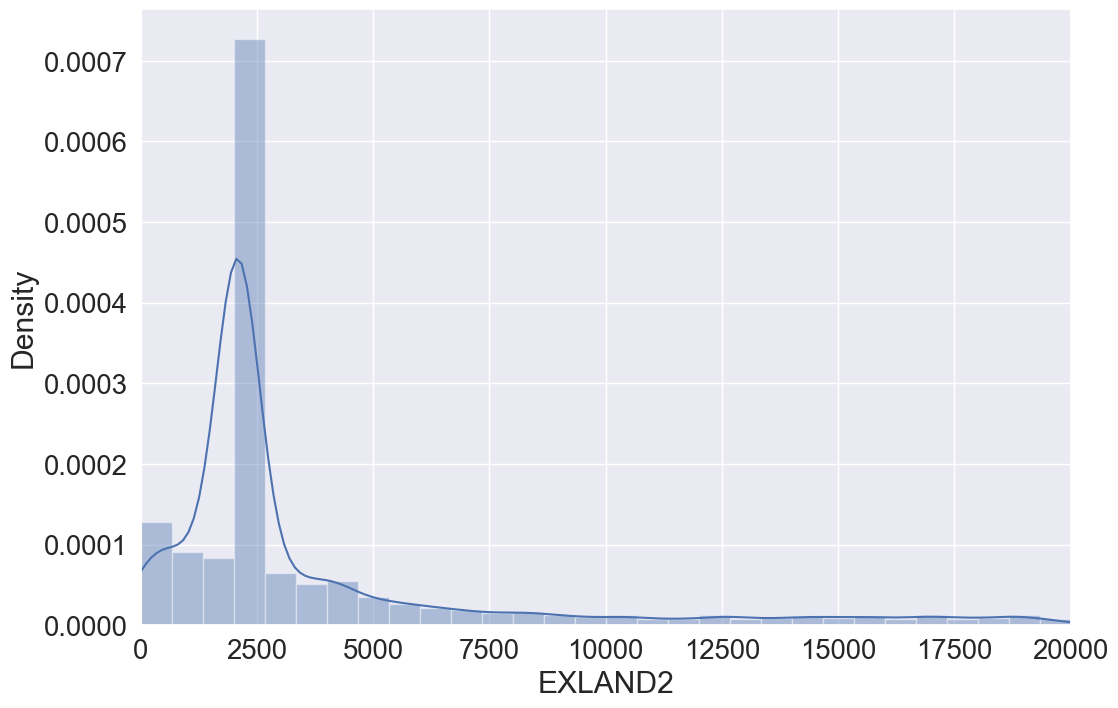

In [382]:
xhigh = 20000
plt.xlim(0,xhigh)
temp = data[data['EXLAND2'] <= xhigh]
sns.distplot(temp['EXLAND2'],bins=30, kde=True)

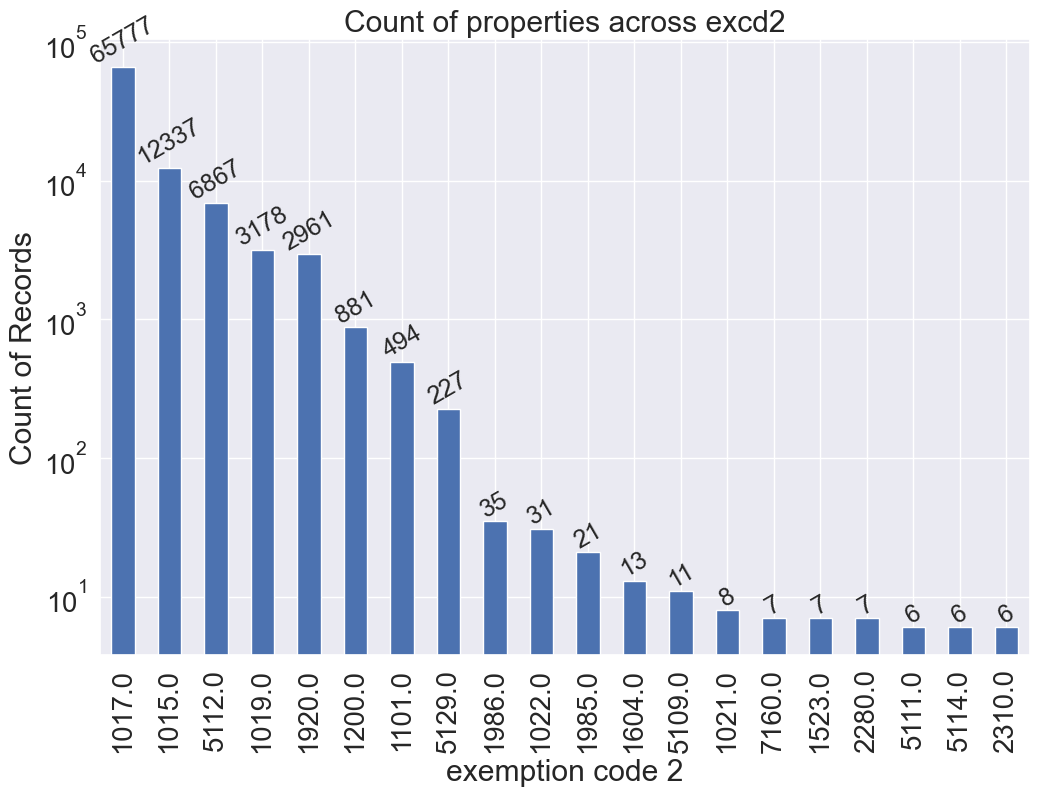

In [394]:
own = data['EXCD2'].value_counts().head(20)

data['EXCD2'].value_counts().head(20).plot(kind='bar', logy = True)
j= 0
for i in own.index:    
        plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
        j = j+1
plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel("exemption code 2")
plt.ylabel("Count of Records")
plt.title('Count of properties across excd2')
plt.savefig('plot.jpeg')

In [378]:
temp['EXLAND2'].value_counts()

2090.0     26393
4180.0       734
2650.0       393
62.0         387
15750.0      113
           ...  
5668.0         1
5892.0         1
9206.0         1
9065.0         1
18335.0        1
Name: EXLAND2, Length: 9283, dtype: int64

In [163]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

<AxesSubplot:xlabel='EXTOT2'>

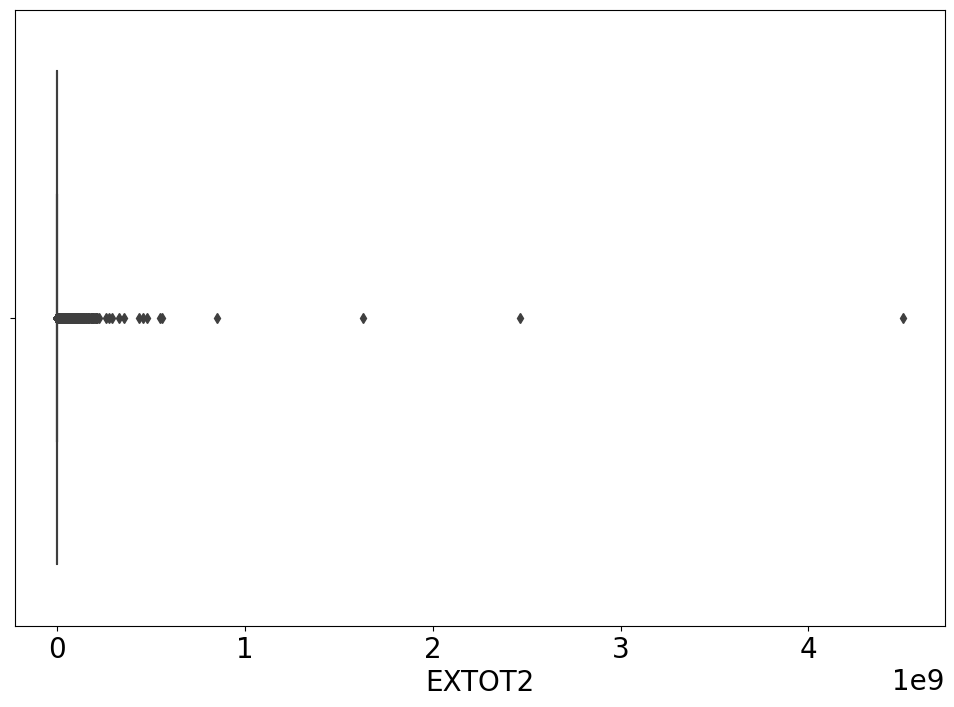

In [164]:
sns.boxplot(x='EXTOT2', data=data)

<AxesSubplot:xlabel='EXTOT2', ylabel='count'>

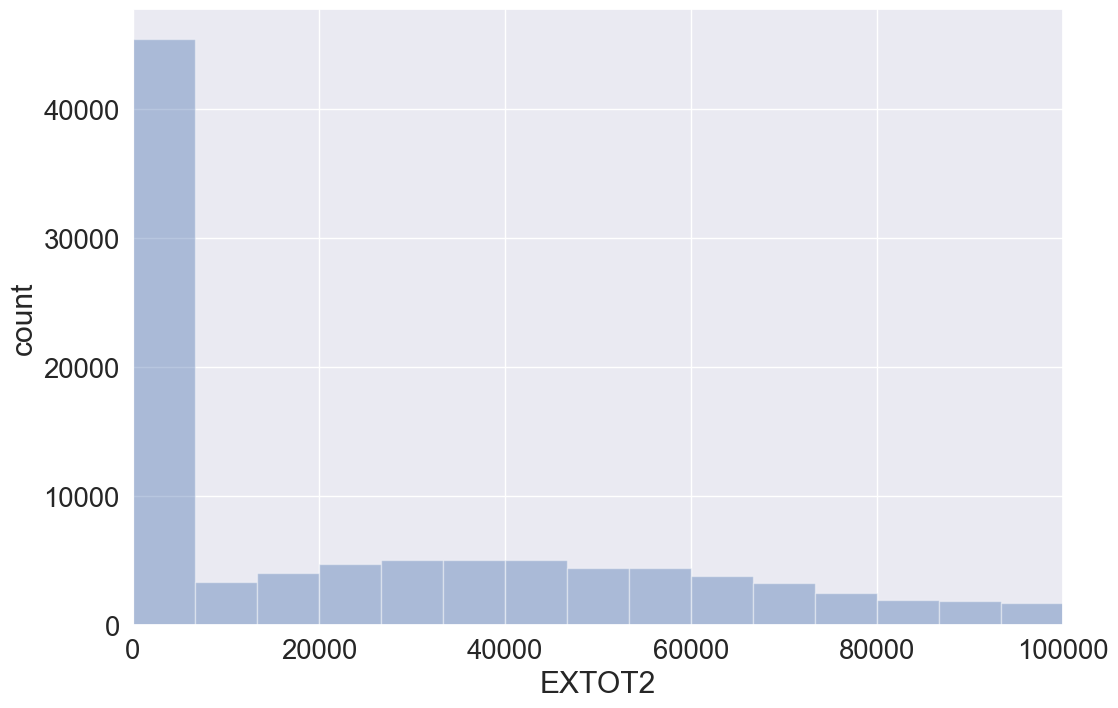

In [392]:
xhigh = 100000
plt.xlim(0,xhigh)
plt.ylabel('count')
temp = data[data['EXTOT2'] <= xhigh]
sns.distplot(temp['EXTOT2'],bins=15, kde=False)

In [166]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

<AxesSubplot:xlabel='EXCD2'>

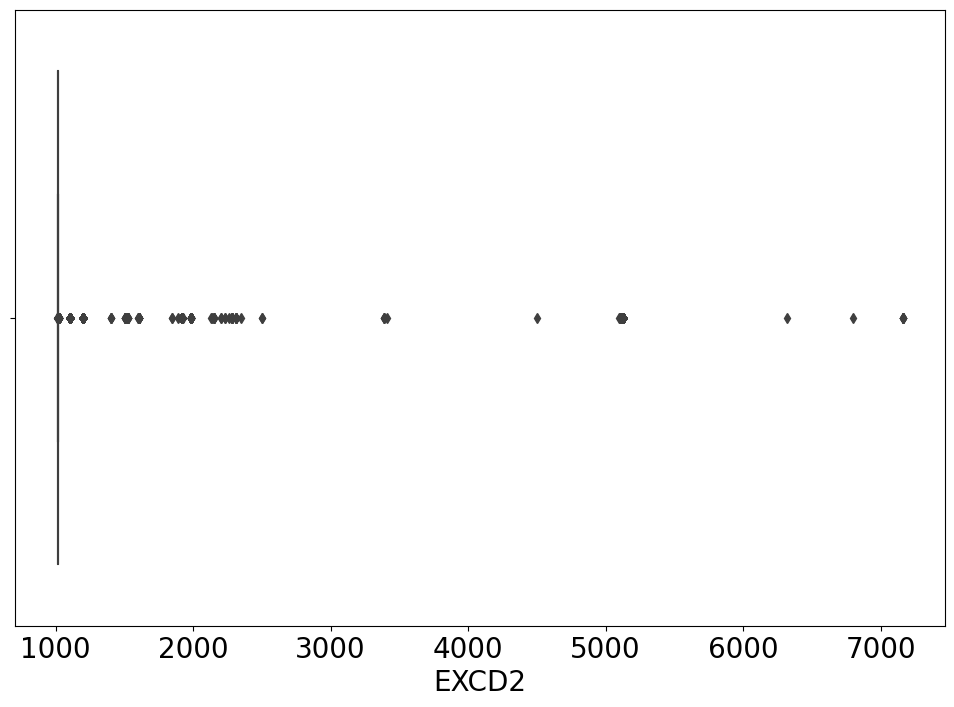

In [167]:
sns.boxplot(x='EXCD2', data=data)

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXCD2'>

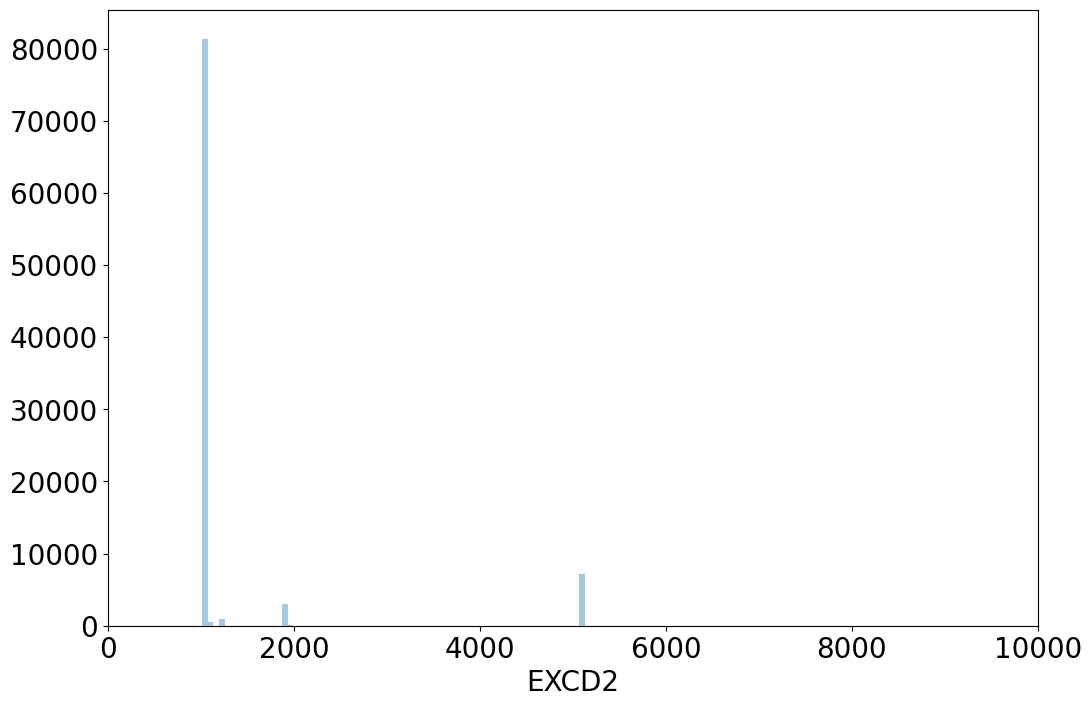

In [168]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXCD2'] <= xhigh]
sns.distplot(temp['EXCD2'],bins=100, kde=False)

In [169]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [170]:
len(data['PERIOD'].unique())

1

In [171]:
data['PERIOD'].value_counts()

FINAL    1070994
Name: PERIOD, dtype: int64

(array([0]), [Text(0, 0, 'FINAL')])

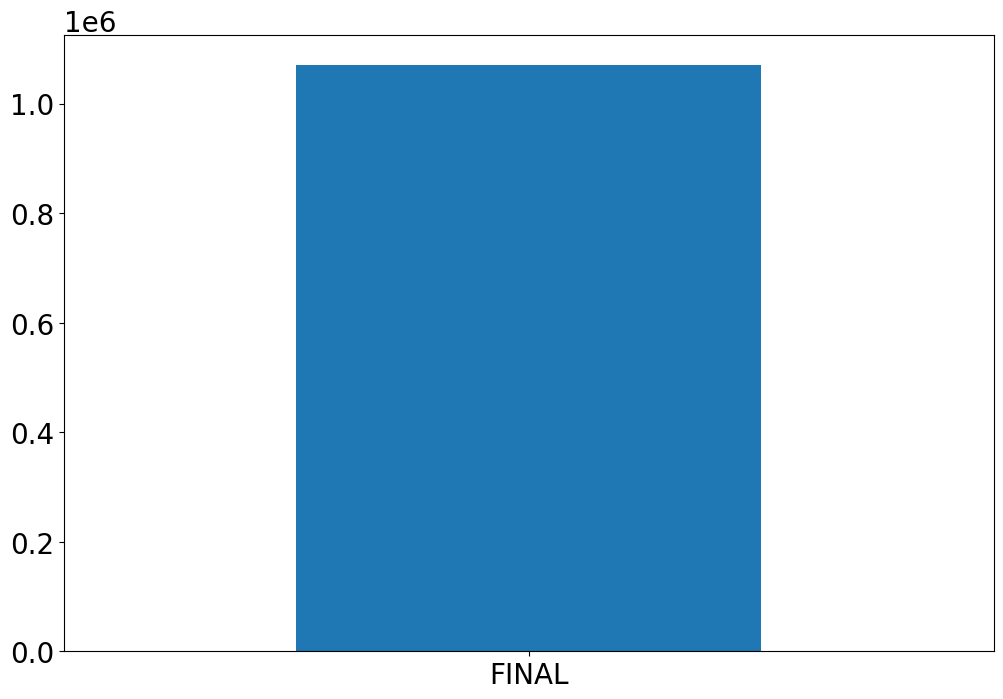

In [172]:
data['PERIOD'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [173]:
data['YEAR'].count() * 100 / numrecords

100.0

In [174]:
len(data['YEAR'].unique())

1

In [175]:
data['YEAR'].value_counts()

2010/11    1070994
Name: YEAR, dtype: int64

(array([0]), [Text(0, 0, '2010/11')])

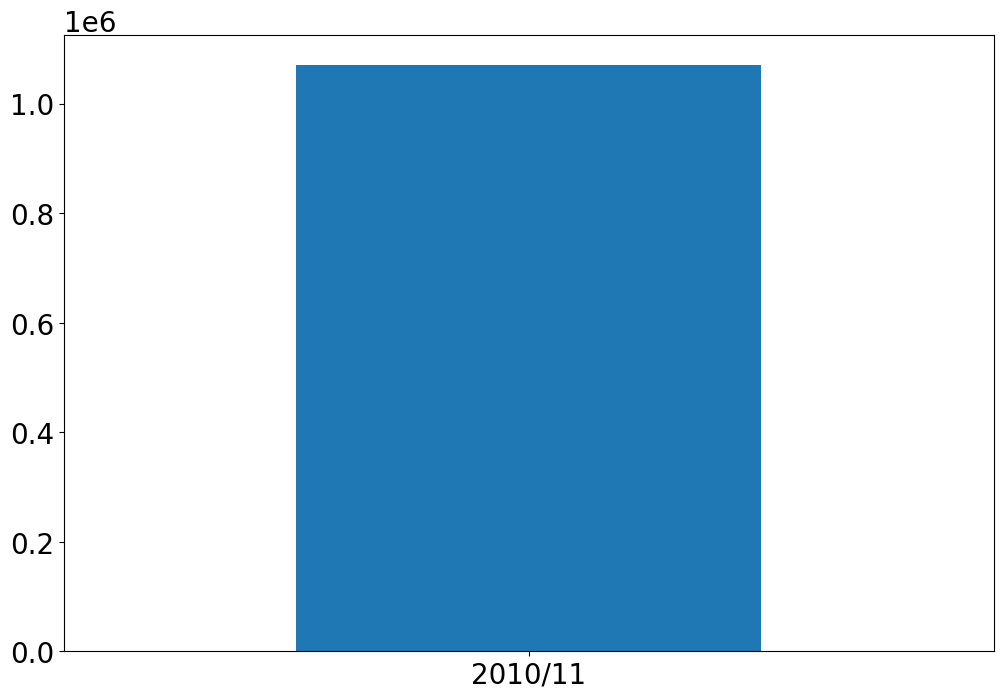

In [176]:
data['YEAR'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [177]:
data['VALTYPE'].count() * 100 / numrecords

100.0

(array([0]), [Text(0, 0, 'AC-TR')])

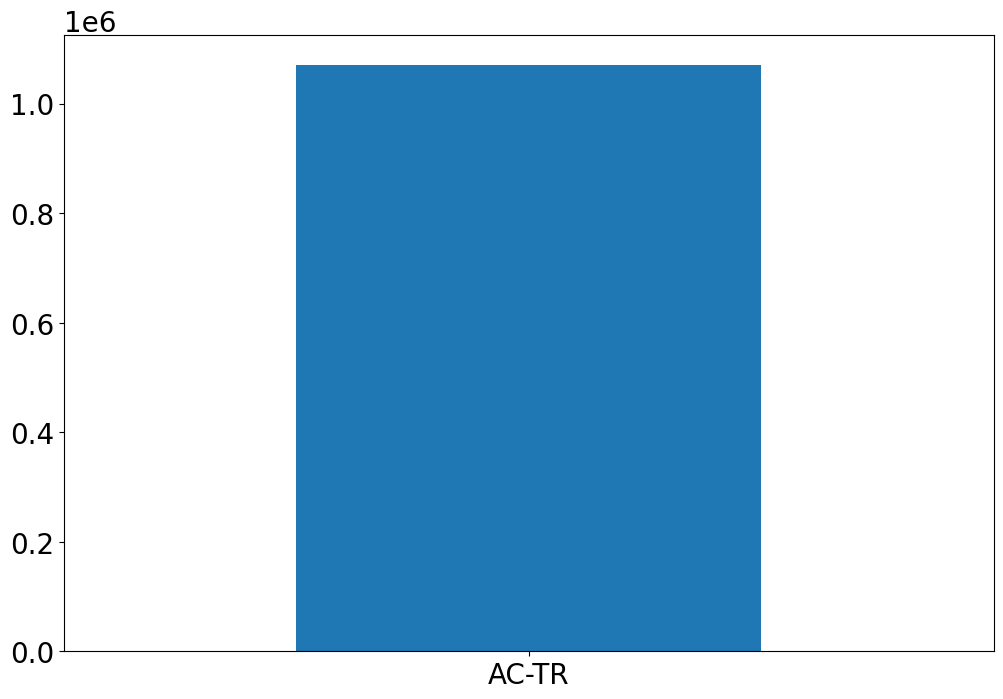

In [178]:
data['VALTYPE'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [179]:
print('duration: ', datetime.now() - start_time)

duration:  0:01:34.159205
